## Comparing KGs to real-world complex networks

Using all instant KGs from the temporal KGen-generated *ISWC* TKG as target

# Environment Setup

Install & imports

In [1]:
# Install required packages
import sys
!pip install -q rdflib networkx matplotlib
!{sys.executable} -m pip install rdflib networkx matplotlib --user

# Imports
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
import collections

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.7 MB/s eta 0:00:00


Auxiliary functions

In [2]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def histogram(l):
    degree_sequence = sorted([d for n, d in list(l.items())], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    print(deg, cnt)

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Histogram")
    plt.ylabel("Count")
    plt.xlabel("Value")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    plt.show()

def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))

    Ref.: https://stackoverflow.com/a/62662992
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

rdfs = {'2002': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2002/merged_kg.ttl',
        '2003': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2003/merged_kg.ttl',
        '2004': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2004/merged_kg.ttl',
        '2005': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2005/merged_kg.ttl',
        '2006': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2006/merged_kg.ttl',
        '2007': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2007/merged_kg.ttl',
        '2008': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2008/merged_kg.ttl',
        '2009': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2009/merged_kg.ttl',
        '2010': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2010/merged_kg.ttl',
        '2011': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2011/merged_kg.ttl',
        '2012': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2012/merged_kg.ttl',
        '2013': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2013/merged_kg.ttl',
        '2014': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2014/merged_kg.ttl',
        '2015': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2015/merged_kg.ttl',
        '2016': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2016/merged_kg.ttl',
        '2017': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2017/merged_kg.ttl',
        '2018': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2018/merged_kg.ttl',
        '2019': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2019/merged_kg.ttl',
        '2020': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2020/merged_kg.ttl',
        '2021': 'https://raw.githubusercontent.com/rossanez/KGen/master/examples/cs/ISWC/2021/merged_kg.ttl'}

## Loading RDF model

Pointing to a remote Turtle (*.ttl) file.

In [3]:
rgs = dict()
for i in rdfs.keys():
    rg = RDFGraph()
    rg.parse(rdfs[i], format='ttl') # Turtle format

    print("rdflib Graph {} loaded successfully with {} triples".format(i, len(rg)))
    rgs[i] = rg

rdflib Graph 2002 loaded successfully with 15957 triples
rdflib Graph 2003 loaded successfully with 23653 triples
rdflib Graph 2004 loaded successfully with 26045 triples
rdflib Graph 2005 loaded successfully with 29158 triples
rdflib Graph 2006 loaded successfully with 27220 triples
rdflib Graph 2007 loaded successfully with 21139 triples
rdflib Graph 2008 loaded successfully with 23183 triples
rdflib Graph 2009 loaded successfully with 24775 triples
rdflib Graph 2010 loaded successfully with 26082 triples
rdflib Graph 2011 loaded successfully with 26817 triples
rdflib Graph 2012 loaded successfully with 22544 triples
rdflib Graph 2013 loaded successfully with 24978 triples
rdflib Graph 2014 loaded successfully with 24949 triples
rdflib Graph 2015 loaded successfully with 21521 triples
rdflib Graph 2016 loaded successfully with 20303 triples
rdflib Graph 2017 loaded successfully with 26336 triples
rdflib Graph 2018 loaded successfully with 24318 triples
rdflib Graph 2019 loaded succes

## Converting rdflib.Graph to networkx.MultiDiGraph

KGs are directed graphs with the possibility of multiple paralell edges.

In [4]:
TKG = dict()
for i in rgs:
    # Conversion of rdflib.Graph to networkx.MultiDiGraph
    KG = rdflib_to_networkx_multidigraph(rgs[i])
    print("networkx Graph loaded successfully with length {}".format(len(KG)))

    TKG[i] = KG

networkx Graph loaded successfully with length 7961
networkx Graph loaded successfully with length 11572
networkx Graph loaded successfully with length 12705
networkx Graph loaded successfully with length 13728
networkx Graph loaded successfully with length 13186
networkx Graph loaded successfully with length 10570
networkx Graph loaded successfully with length 11406
networkx Graph loaded successfully with length 12116
networkx Graph loaded successfully with length 12753
networkx Graph loaded successfully with length 13135
networkx Graph loaded successfully with length 11261
networkx Graph loaded successfully with length 12132
networkx Graph loaded successfully with length 11767
networkx Graph loaded successfully with length 10713
networkx Graph loaded successfully with length 10037
networkx Graph loaded successfully with length 12717
networkx Graph loaded successfully with length 11755
networkx Graph loaded successfully with length 12285
networkx Graph loaded successfully with length 

# General Network Metrics

Network size and density

In [5]:
for i in TKG:
    # Network size
    print(f"NETWORK {i} SIZE")
    print("============")
    print("The network has {} nodes and {} edges".format(TKG[i].number_of_nodes(), TKG[i].number_of_edges()))
    print()

    # Density
    print(f"NETWORK {i} DENSITY")
    print("============")
    print("The network density is {}".format(nx.density(TKG[i])))
    print()

NETWORK 2002 SIZE
The network has 7961 nodes and 15957 edges

NETWORK 2002 DENSITY
The network density is 0.00025180859706142825

NETWORK 2003 SIZE
The network has 11572 nodes and 23653 edges

NETWORK 2003 DENSITY
The network density is 0.00017664726317504192

NETWORK 2004 SIZE
The network has 12705 nodes and 26045 edges

NETWORK 2004 DENSITY
The network density is 0.00016136494983529562

NETWORK 2005 SIZE
The network has 13728 nodes and 29158 edges

NETWORK 2005 DENSITY
The network density is 0.00015473010756029623

NETWORK 2006 SIZE
The network has 13186 nodes and 27220 edges

NETWORK 2006 DENSITY
The network density is 0.00015656508399613224

NETWORK 2007 SIZE
The network has 10570 nodes and 21139 edges

NETWORK 2007 DENSITY
The network density is 0.0001892237101542837

NETWORK 2008 SIZE
The network has 11406 nodes and 23183 edges

NETWORK 2008 DENSITY
The network density is 0.0001782136554416586

NETWORK 2009 SIZE
The network has 12116 nodes and 24775 edges

NETWORK 2009 DENSITY
Th

# Scale-free Networks

In-degree distribution -- Is it Poisson's or Power-law alike?

Text(0, 0.5, 'Frequency')

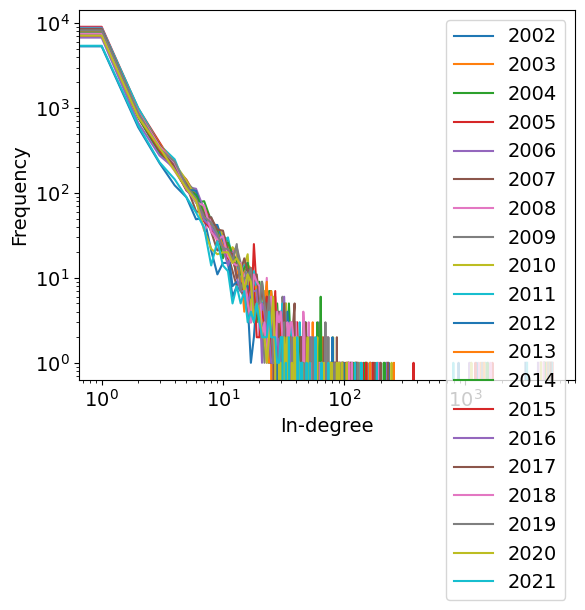

In [6]:
styles = {'2019': 'ro-',
          '2020': 'gx-.',
          '2021': 'b*--'}
plt.rcParams.update({'font.size': 14})
#plt.figure(figsize=(12, 8))

for i in TKG:
    degree_freq = degree_histogram_directed(TKG[i], in_degree=True)
    degrees = range(len(degree_freq))
    plt.loglog(degrees, degree_freq, label=i)
plt.legend(loc="upper right")
plt.xlabel('In-degree')
plt.ylabel('Frequency')

Out-degree distribution

Text(0, 0.5, 'Frequency')

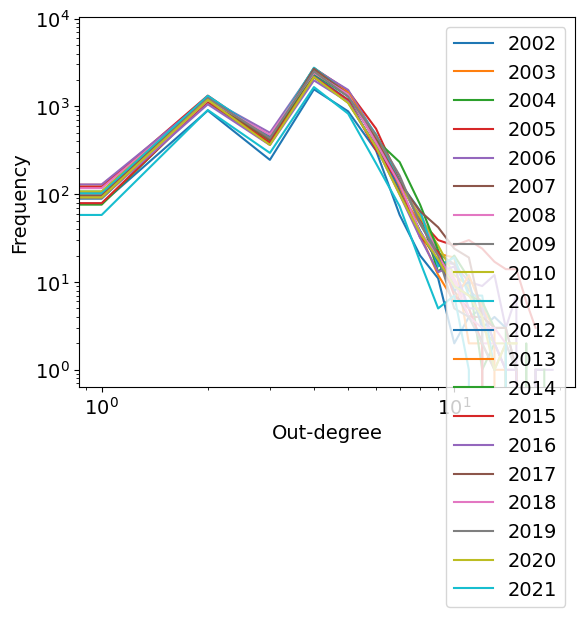

In [7]:
plt.rcParams.update({'font.size': 14})
#plt.figure(figsize=(12, 8))

for i in TKG:
    degree_freq = degree_histogram_directed(TKG[i], out_degree=True)
    degrees = range(len(degree_freq))
    plt.loglog(degrees, degree_freq, label=i)
plt.legend(loc="upper right")
plt.xlabel('Out-degree')
plt.ylabel('Frequency')

Are there HUBS available?

In [8]:
for i in ['2019']:
    h, a = nx.hits(TKG[i])

    print(f"Network {i} Hubs:")
    print(sorted(h.items(), key=lambda x:x[1], reverse=True)) # Hubs - estimates the node value based on outgoing links.
    print("The mean is {}, with stdev {}".format(mean(h.values()), statistics.stdev(h.values())))
    print("The greatest hub is {}, with value {}".format(max(h, key=h.get), max(h.values())))
    print("")
    print(f"Network {i} Authorities:")
    print(sorted(a.items(), key=lambda x:x[1], reverse=True)) # Authorities - estimates the node value based on the incoming links
    print("The mean is {}, with stdev {}".format(mean(a.values()), statistics.stdev(a.values())))
    print("The greatest authority is {}, with value {}".format(max(a, key=a.get), max(a.values())))
    print("")

Network 2019 Hubs:
[(rdflib.term.URIRef('http://local/local.owl#fact_that_rdf_graph_be_often_therefore_only_accessible_via_query'), 0.0002163058018475639), (rdflib.term.URIRef('http://local/local.owl#make_knowledge_graph_available_in_multiple_language_most_knowledge_graph_be_in_english'), 0.00021552265531568111), (rdflib.term.URIRef('http://local/local.owl#eventkg_knowledge_graph'), 0.0002154797158606931), (rdflib.term.URIRef('http://local/local.owl#knowledge_graph_graph'), 0.0002154797158606931), (rdflib.term.URIRef('http://local/local.owl#rdf_knowledge_graph'), 0.0002154797158606931), (rdflib.term.URIRef('http://local/local.owl#wikidata_knowledge_graph'), 0.0002154797158606931), (rdflib.term.URIRef('http://local/local.owl#dbpedia_knowledge_graph'), 0.0002154797158606931), (rdflib.term.URIRef('http://local/local.owl#information_knowledge_graph'), 0.0002154797158606931), (rdflib.term.URIRef('http://local/local.owl#current_knowledge_graph'), 0.0002154797158606931), (rdflib.term.URIRef('

In [9]:
for i in ['2020']:
    h, a = nx.hits(TKG[i])

    print(f"Network {i} Hubs:")
    print(sorted(h.items(), key=lambda x:x[1], reverse=True)) # Hubs - estimates the node value based on outgoing links.
    print("The mean is {}, with stdev {}".format(mean(h.values()), statistics.stdev(h.values())))
    print("The greatest hub is {}, with value {}".format(max(h, key=h.get), max(h.values())))
    print("")
    print(f"Network {i} Authorities:")
    print(sorted(a.items(), key=lambda x:x[1], reverse=True)) # Authorities - estimates the node value based on the incoming links
    print("The mean is {}, with stdev {}".format(mean(a.values()), statistics.stdev(a.values())))
    print("The greatest authority is {}, with value {}".format(max(a, key=a.get), max(a.values())))
    print("")

Network 2020 Hubs:
[(rdflib.term.URIRef('http://local/local.owl#structure_of_a_the_entity_of_a_knowledge_base_the_hyperlink_graph_of_the_graph_of_an_rdf_the_entity_of_a_knowledge_base_and_basekb_to_benefit_from_the_precise_semantics_of_relationship_between_entity'), 0.0002522870091860749), (rdflib.term.URIRef('http://local/local.owl#structure_of_a_the_entity_of_a_knowledge_base_the_hyperlink_graph_of_the_graph_of_an_rdf_the_entity_of_a_knowledge_base_and_yago_to_benefit_from_the_precise_semantics_of_relationship_between_entity'), 0.0002522870091860749), (rdflib.term.URIRef('http://local/local.owl#recent_mainstream_solution_for_the_problem_of_structurebased_entity_alignment_between_knowledge_graph_apply_knowledge_graph_embed_technique_to_map_entity_into_a_vector_space_where_the_similarity_between_entity'), 0.0002505847523973097), (rdflib.term.URIRef('http://local/local.owl#global_score_with_important_property_a_novel_rdfbased_entity_relatedness_measure_for_global_score_have_a_clear_sema

In [10]:
for i in ['2021']:
    h, a = nx.hits(TKG[i])

    print(f"Network {i} Hubs:")
    print(sorted(h.items(), key=lambda x:x[1], reverse=True)) # Hubs - estimates the node value based on outgoing links.
    print("The mean is {}, with stdev {}".format(mean(h.values()), statistics.stdev(h.values())))
    print("The greatest hub is {}, with value {}".format(max(h, key=h.get), max(h.values())))
    print("")
    print(f"Network {i} Authorities:")
    print(sorted(a.items(), key=lambda x:x[1], reverse=True)) # Authorities - estimates the node value based on the incoming links
    print("The mean is {}, with stdev {}".format(mean(a.values()), statistics.stdev(a.values())))
    print("The greatest authority is {}, with value {}".format(max(a, key=a.get), max(a.values())))
    print("")

Network 2021 Hubs:
[(rdflib.term.URIRef('http://local/local.owl#we_exist_knowledge_in_wikidata_to_construct_a_graph_of_possible_relationship_in_the_table'), 0.0003244653002914285), (rdflib.term.URIRef('http://local/local.owl#we_exist_knowledge_in_wikidata_to_construct_a_graph_of_possible_relationship_in_the_table_context'), 0.0003234881329721545), (rdflib.term.URIRef('http://local/local.owl#investigate_the_result_complexity_of_validate_property_graph_against_set_of_progs_shape_compare_with_correspond_result_for_shaclfor_many_year_link_prediction_on_knowledge_graph_have_be_a_purely_transductive_task_not_allow_for_reason_on_unseen_entity'), 0.0003224965071292072), (rdflib.term.URIRef('http://local/local.owl#result_complexity_of_validate_property_graph_against_set_of_progs_shape_compare_with_correspond_result_for_shaclfor_many_year_link_prediction_on_knowledge_graph_have_be_a_purely_transductive_task_not_allow_for_reason_on_unseen_entity'), 0.00032249650712920714), (rdflib.term.URIRef('ht

# Communities

Check for communities using the Clauset-Newman-Moore Algorithm (greedy modularity - applicable to directed graphs)

In [11]:
for k in TKG:
    comms = nx.community.greedy_modularity_communities(TKG[k])

    print(f'Network {k} -- Found {len(comms)} communities.')
    idx = 0
    for i in comms:
        print(f'Community {idx} has {len(i)} nodes.')
        #print(i)
        idx = idx + 1

Network 2002 -- Found 58 communities.
Community 0 has 969 nodes.
Community 1 has 924 nodes.
Community 2 has 555 nodes.
Community 3 has 517 nodes.
Community 4 has 442 nodes.
Community 5 has 426 nodes.
Community 6 has 386 nodes.
Community 7 has 321 nodes.
Community 8 has 251 nodes.
Community 9 has 247 nodes.
Community 10 has 220 nodes.
Community 11 has 217 nodes.
Community 12 has 206 nodes.
Community 13 has 169 nodes.
Community 14 has 158 nodes.
Community 15 has 147 nodes.
Community 16 has 134 nodes.
Community 17 has 126 nodes.
Community 18 has 124 nodes.
Community 19 has 120 nodes.
Community 20 has 111 nodes.
Community 21 has 110 nodes.
Community 22 has 105 nodes.
Community 23 has 104 nodes.
Community 24 has 101 nodes.
Community 25 has 99 nodes.
Community 26 has 72 nodes.
Community 27 has 60 nodes.
Community 28 has 45 nodes.
Community 29 has 43 nodes.
Community 30 has 41 nodes.
Community 31 has 40 nodes.
Community 32 has 37 nodes.
Community 33 has 31 nodes.
Community 34 has 29 nodes.
Co

# Small-world networks

Does it have a low average shortest path?

In [12]:
for i in TKG:
    if nx.is_strongly_connected(TKG[i]):
        print(f'Network {i} -- Average shortest path length: {nx.average_shortest_path_length(TKG[i])}')
    else:
        print(f'Network {i} is NOT strongly connected!')

Network 2002 is NOT strongly connected!
Network 2003 is NOT strongly connected!
Network 2004 is NOT strongly connected!
Network 2005 is NOT strongly connected!
Network 2006 is NOT strongly connected!
Network 2007 is NOT strongly connected!
Network 2008 is NOT strongly connected!
Network 2009 is NOT strongly connected!
Network 2010 is NOT strongly connected!
Network 2011 is NOT strongly connected!
Network 2012 is NOT strongly connected!
Network 2013 is NOT strongly connected!
Network 2014 is NOT strongly connected!
Network 2015 is NOT strongly connected!
Network 2016 is NOT strongly connected!
Network 2017 is NOT strongly connected!
Network 2018 is NOT strongly connected!
Network 2019 is NOT strongly connected!
Network 2020 is NOT strongly connected!
Network 2021 is NOT strongly connected!


Does it have a high clustering coefficient?

In [13]:
for i in TKG:
    # create weighted graph from M, as method is not implemented for MultiDiGraphs
    DG = nx.DiGraph()
    for u,v in TKG[i].edges():
        if DG.has_edge(u,v):
            DG[u][v]['weight'] += 1
        else:
            DG.add_edge(u, v, weight=1)

    ccs = nx.clustering(DG,weight='weight').values()

    print(f"Network {i} -- Clustering coefficient: {sum(ccs)/len(ccs)}")

Network 2002 -- Clustering coefficient: 0.0300421276589065
Network 2003 -- Clustering coefficient: 0.02968289412115391
Network 2004 -- Clustering coefficient: 0.0283351278293235
Network 2005 -- Clustering coefficient: 0.028126581527134646
Network 2006 -- Clustering coefficient: 0.029593991378998485
Network 2007 -- Clustering coefficient: 0.02986989718248909
Network 2008 -- Clustering coefficient: 0.029926117436865407
Network 2009 -- Clustering coefficient: 0.028731994193830598
Network 2010 -- Clustering coefficient: 0.02923159811563101
Network 2011 -- Clustering coefficient: 0.02907536591102166
Network 2012 -- Clustering coefficient: 0.028647342634912202
Network 2013 -- Clustering coefficient: 0.02838606545619196
Network 2014 -- Clustering coefficient: 0.02759696190532119
Network 2015 -- Clustering coefficient: 0.028261968568502317
Network 2016 -- Clustering coefficient: 0.02935703199321422
Network 2017 -- Clustering coefficient: 0.029302805475271868
Network 2018 -- Clustering coeffici

# Some Centrality Measurements

NW 2002 DEGREE CENTRALITY
The mean degree centrality is 0.0005036171941228871, with stdev 0.004592002912187553
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.39221105527638195
The minimum node is approach offer qualitatively higher retrieval precision than exist approach without sacrifice computational tractability or scalabilitythe development of the semantic web proceed in layer, with value 0.0001256281407035176
(0.39221105527638195, 0.11017587939698494, 0.014824120603015077, 0.012814070351758796, 0.01256281407035176, 0.011055276381909548, 0.00992462311557789, 0.008668341708542714, 0.007537688442211056, 0.007286432160804021, 0.006909547738693468, 0.006407035175879398, 0.005276381909547739, 0.0050251256281407045, 0.004899497487437186, 0.004648241206030151, 0.004522613065326634, 0.004396984924623116, 0.004271356783919598, 0.004145728643216081, 0.004020100502512563, 0.0038944723618090458, 0.003768844221105528, 0.0036432160804020105, 0.0035175879396984

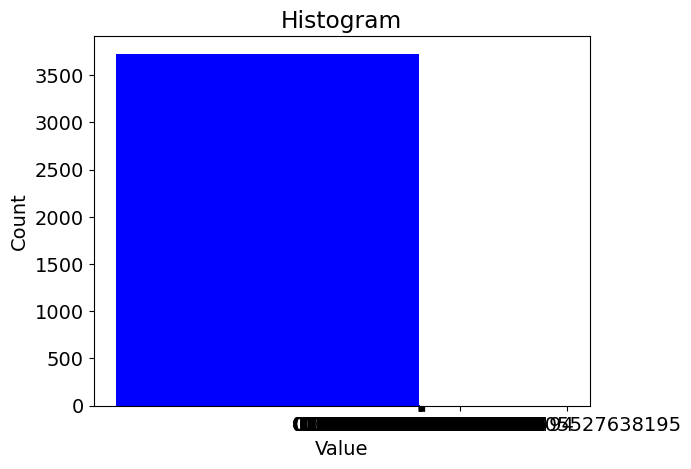


NW 2003 DEGREE CENTRALITY
The mean degree centrality is 0.0003532945263499696, with stdev 0.0037621067405494094
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.38605133523463836
The minimum node is the tm validation process includes we merging conditionsa nonstandard metamodeling architecture which makes some elements in the model have dual roles in the rdf schema specification, with value 8.642295393656556e-05
(0.38605133523463836, 0.1146832598738225, 0.016593207155820588, 0.01088929219600726, 0.009592947886958776, 0.008901564255466253, 0.00855587243971999, 0.007173105176734941, 0.006049606775559589, 0.005876760867686458, 0.005790337913749892, 0.005531069051940196, 0.005271800190130499, 0.0049261083743842365, 0.00466683951257454, 0.004493993604701409, 0.0044075706507648435, 0.00388903292714545, 0.0036297640653357535, 0.003543341111399188, 0.003456918157462622, 0.0032840722495894913, 0.0031976492956529256, 0.00311122634171636, 0.0030248033877797943, 

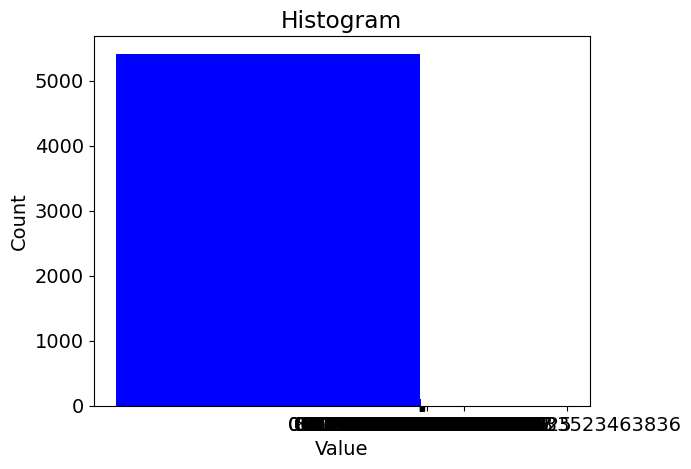


NW 2004 DEGREE CENTRALITY
The mean degree centrality is 0.0003227298996705768, with stdev 0.00359218810794453
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.3845245591939547
The minimum node is metadata author, with value 7.871536523929471e-05
(0.3845245591939547, 0.12019836272040302, 0.01818324937027708, 0.013617758186397984, 0.0118860201511335, 0.008658690176322419, 0.0076353904282115866, 0.005903652392947103, 0.005431360201511335, 0.0051952141057934505, 0.005116498740554156, 0.005037783375314861, 0.004880352644836272, 0.004644206549118388, 0.0044867758186397984, 0.004408060453400504, 0.003935768261964736, 0.0036209068010075564, 0.003542191435768262, 0.0034634760705289673, 0.0033060453400503777, 0.003227329974811083, 0.003148614609571788, 0.002991183879093199, 0.0029124685138539044, 0.0028337531486146094, 0.0026763224181360202, 0.0025976070528967252, 0.0025188916876574307, 0.002440176322418136, 0.002361460957178841, 0.0022827455919395465, 0.002204

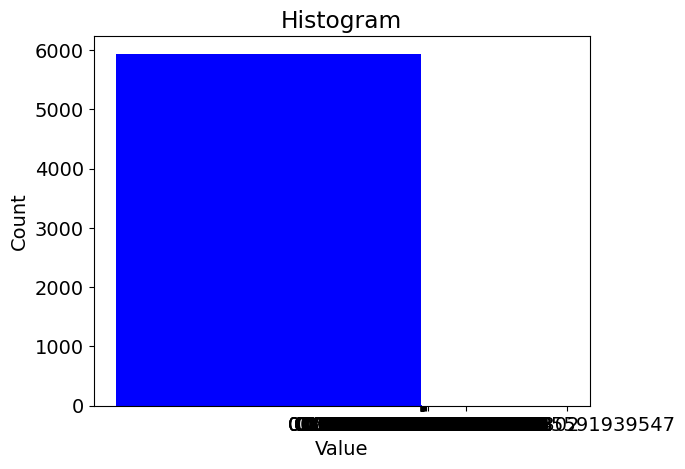


NW 2005 DEGREE CENTRALITY
The mean degree centrality is 0.00030946021512065616, with stdev 0.003439947142639506
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.38063670139141836
The minimum node is we data one table per rdfs class or property with explicit storage of subsumption relationships a a single table with triples of the form subjectpredicateobject id or not identifiers represent a hybrid of the schemaaware, with value 7.284912945290303e-05
(0.38063670139141836, 0.12173089531580097, 0.027318423544838637, 0.012821446783710933, 0.012165804618634807, 0.011364464194652873, 0.010635972900123842, 0.009688934217236104, 0.008523348145989654, 0.008013404239819335, 0.007940555110366431, 0.007867705980913528, 0.007212063815837401, 0.006920667298025788, 0.006556421650761273, 0.006410723391855467, 0.005973628615138049, 0.005900779485685146, 0.00553653383842063, 0.005317986450061921, 0.005099439061703213, 0.0049537408027974066, 0.004735193414438697, 0.0046

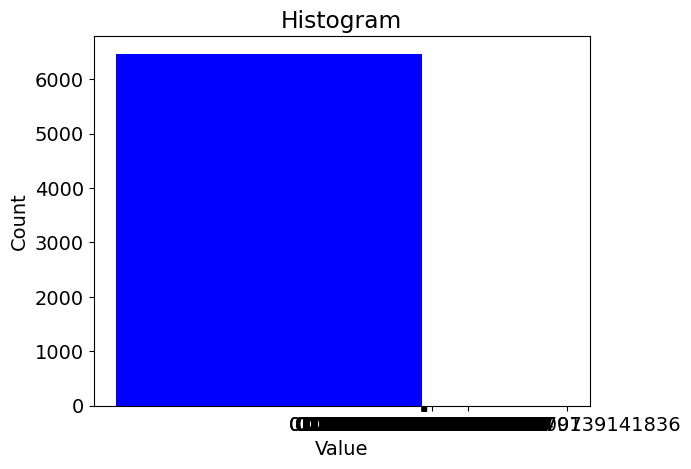


NW 2006 DEGREE CENTRALITY
The mean degree centrality is 0.0003131301679921967, with stdev 0.003535237402939738
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.38642396662874473
The minimum node is access control policies based on entitys identitiesroles as in traditional access control solutions, with value 7.584376185058778e-05
(0.38642396662874473, 0.11672354948805459, 0.015168752370117557, 0.015092908608266968, 0.012665908229048159, 0.009859689040576412, 0.008646188850967008, 0.008418657565415244, 0.0064467197572999615, 0.006370875995449374, 0.005991657186196435, 0.00583996966249526, 0.005764125900644672, 0.005081532043989381, 0.004854000758437618, 0.00477815699658703, 0.004702313234736443, 0.004247250663632916, 0.004171406901782328, 0.004019719378081152, 0.003868031854379977, 0.0037921880925293893, 0.0037163443306788015, 0.0036405005688282133, 0.0035646568069776256, 0.003488813045127038, 0.0032612817595752746, 0.003185437997724687, 0.003109594235

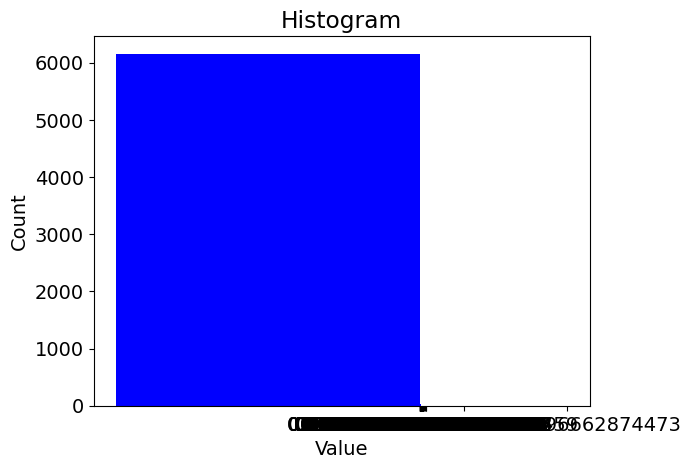


NW 2007 DEGREE CENTRALITY
The mean degree centrality is 0.0003784474203085237, with stdev 0.004003740975502855
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.3956854953164916
The minimum node is our analysis leads to a suit of conclusions about the status of the semantic webwe present a semanticbased approach to multiissue bilateral negotiation for ecommerce, with value 9.46163307786924e-05
(0.3956854953164916, 0.10530797615668465, 0.019112498817295865, 0.017125555870943325, 0.010502412716434857, 0.008799318762418393, 0.00823162077774624, 0.008137004446967546, 0.00785315545463147, 0.0067177594852871605, 0.005676979846721544, 0.0054877471851641595, 0.0047308165389346206, 0.004352351215819851, 0.004257734885041158, 0.004068502223483773, 0.0038792695619263885, 0.0036900369003690036, 0.003500804238811619, 0.003216955246475542, 0.003027722584918157, 0.0029331062541394647, 0.002838489923360772, 0.0026492572618033875, 0.002554640931024695, 0.00246002460024

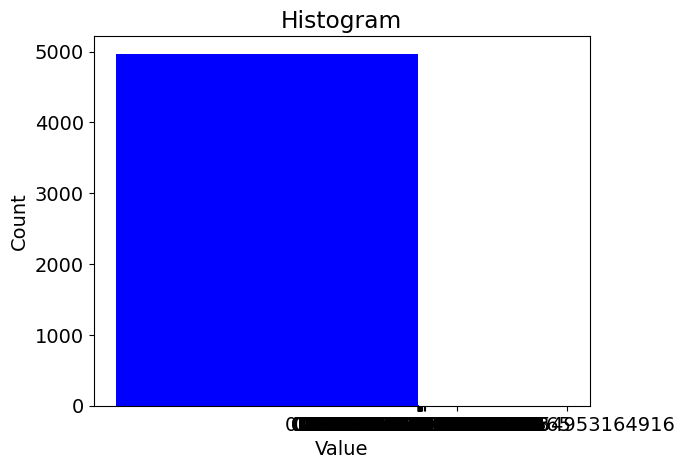


NW 2008 DEGREE CENTRALITY
The mean degree centrality is 0.0003564273108833032, with stdev 0.003830220421937861
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.3911442349846559
The minimum node is scenario incremental map revision, with value 8.768084173608067e-05
(0.3911442349846559, 0.11214379658044718, 0.019289785181937746, 0.01683472161332749, 0.010872424375274003, 0.008329679964927663, 0.006663743971942131, 0.00648838228846997, 0.006400701446733889, 0.005611573871109163, 0.004997807978956598, 0.004471722928540115, 0.004384042086804034, 0.004296361245067953, 0.0042086804033318725, 0.004120999561595792, 0.004033318719859711, 0.00394563787812363, 0.0038579570363875496, 0.003770276194651469, 0.003682595352915388, 0.0035949145111793075, 0.003419552827707146, 0.0033318719859710653, 0.003244191144234985, 0.0031565103024989044, 0.0030688294607628236, 0.0028934677772906622, 0.0028057869355545815, 0.002718106093818501, 0.00263042525208242, 0.00254274441034

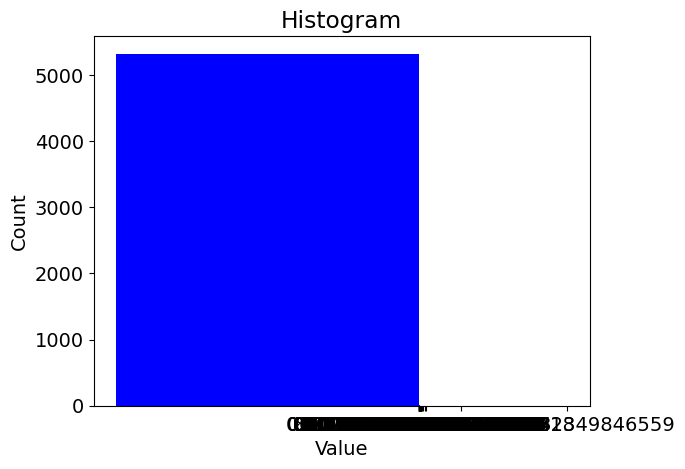


NW 2009 DEGREE CENTRALITY
The mean degree centrality is 0.0003375677707323357, with stdev 0.003679774956599064
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.38563763929013617
The minimum node is automatically the difference between version of the same ontology in order to store resource delta be a challenge task for escience, with value 8.254230293025175e-05
(0.38563763929013617, 0.11671481634337597, 0.018737102765167147, 0.013536937680561287, 0.009244737928188196, 0.009162195625257944, 0.008336772595955427, 0.007758976475443664, 0.007511349566652909, 0.006190672719768881, 0.006025588113908378, 0.005860503508047874, 0.004374742055303343, 0.004292199752373091, 0.004209657449442839, 0.004127115146512587, 0.003962030540652084, 0.003879488237721832, 0.0037969459347915804, 0.0037144036318613287, 0.003549319026000825, 0.0033842344201403217, 0.003219149814279818, 0.0031366075113495664, 0.002971522905489063, 0.002888980602558811, 0.0028064382996285595, 0.0

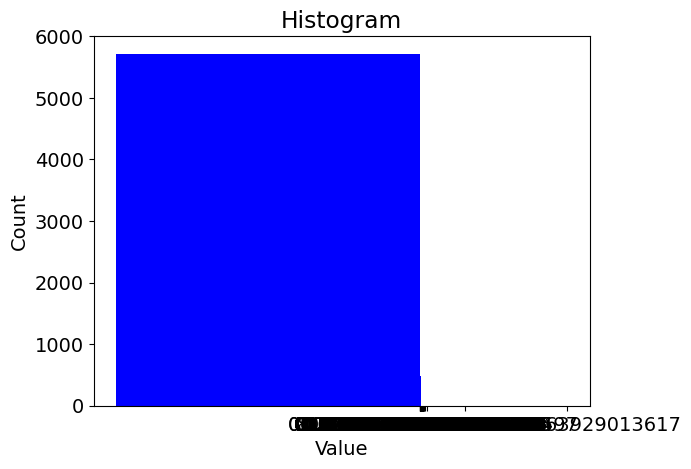


NW 2010 DEGREE CENTRALITY
The mean degree centrality is 0.00032076001306943704, with stdev 0.003611166651402864
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.3892722710163111
The minimum node is circumscribed el ot that attribute inheritance with specificitybased, with value 7.841907151819322e-05
(0.3892722710163111, 0.11441342534504391, 0.019604767879548304, 0.012233375156838143, 0.010664993726474278, 0.009880803011292346, 0.008626097867001255, 0.006508782936010037, 0.0058814303638644915, 0.0058030112923462985, 0.005410915934755332, 0.005018820577164366, 0.004783563362609786, 0.00439146800501882, 0.0042346298619824335, 0.0041562107904642405, 0.0039993726474278546, 0.003920953575909661, 0.0037641154328732747, 0.0036856963613550813, 0.003607277289836888, 0.0034504391468005015, 0.003215181932245922, 0.0031367628607277286, 0.0030583437892095357, 0.0029799247176913422, 0.0029015056461731492, 0.002744667503136763, 0.002509410288582183, 0.002430991217063

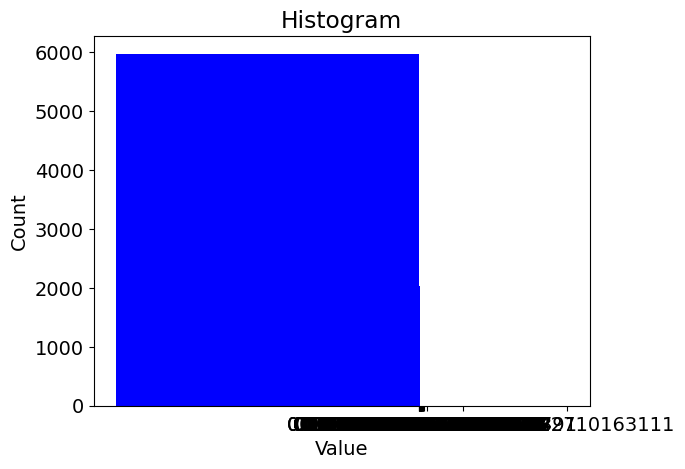


NW 2011 DEGREE CENTRALITY
The mean degree centrality is 0.0003108945426164581, with stdev 0.0035718622488438824
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.39173138419369574
The minimum node is set of similarity function on semantic feature, with value 7.613826709304096e-05
(0.39173138419369574, 0.11238008222932845, 0.0143139942134917, 0.011496878331049185, 0.010735495660118775, 0.009745698187909243, 0.007385411908024973, 0.005634231764885031, 0.005101263895233744, 0.004644434292675499, 0.004416019491396375, 0.0041876046901172526, 0.004035328155931171, 0.003883051621745089, 0.003806913354652048, 0.003730775087559007, 0.003654636820465966, 0.003502360286279884, 0.003426222019186843, 0.0032739454850007612, 0.003045530683721638, 0.0029693924166285975, 0.0028932541495355563, 0.0028171158824425156, 0.0027409776153494744, 0.0026648393482564337, 0.002512562814070352, 0.0024364245469773106, 0.0023602862798842695, 0.0022841480127912287, 0.0022080097456981

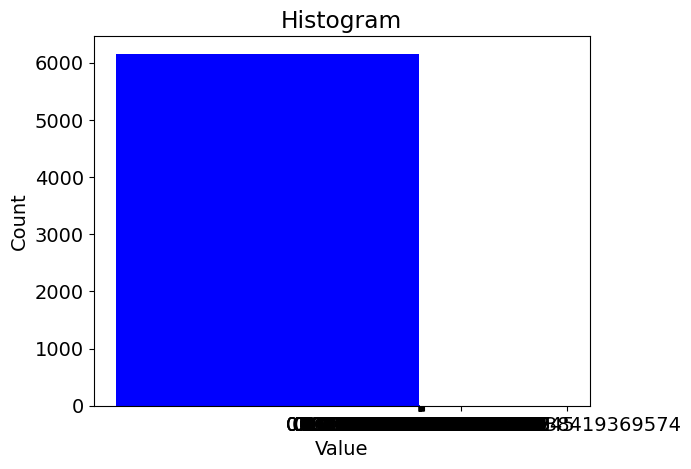


NW 2012 DEGREE CENTRALITY
The mean degree centrality is 0.00035558679313043385, with stdev 0.0038742562178337926
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.3942273534635879
The minimum node is logical language, with value 8.880994671403197e-05
(0.3942273534635879, 0.10985790408525754, 0.020870337477797513, 0.010657193605683835, 0.008969804618117229, 0.008259325044404972, 0.007637655417406749, 0.007371225577264653, 0.007282415630550622, 0.0063943161634103015, 0.004706927175843694, 0.004618117229129662, 0.004529307282415631, 0.004262877442273535, 0.0038188277087033745, 0.003641207815275311, 0.0034635879218472467, 0.003374777975133215, 0.0032859680284191826, 0.0031971580817051507, 0.003019538188277087, 0.0029307282415630548, 0.002841918294849023, 0.002753108348134991, 0.002664298401420959, 0.002575488454706927, 0.002486678507992895, 0.0023978685612788633, 0.002309058614564831, 0.002220248667850799, 0.0021314387211367673, 0.002042628774422735, 0.001

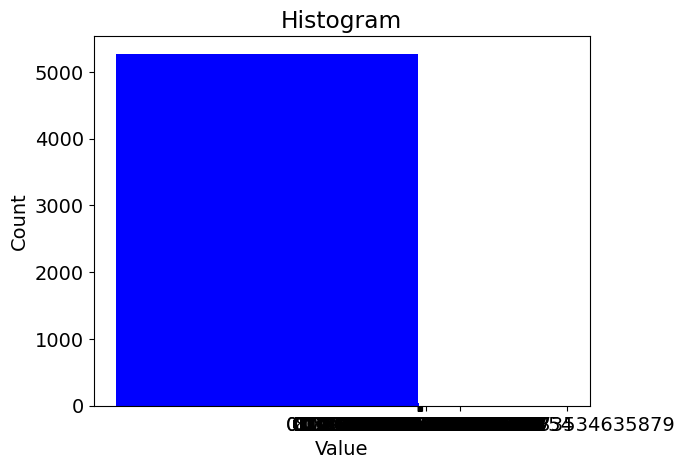


NW 2013 DEGREE CENTRALITY
The mean degree centrality is 0.000339436587448222, with stdev 0.0037065018822118895
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.38850877916082766
The minimum node is mathematical scholarly, with value 8.24334350012365e-05
(0.38850877916082766, 0.11771494518176573, 0.021350259665320254, 0.01368395021020526, 0.012694748990190421, 0.009150111285137251, 0.008902810980133543, 0.0075838760201137586, 0.007089275410106339, 0.006429807930096447, 0.006017640755090265, 0.005935207320089028, 0.005687907015085319, 0.005110872970076663, 0.005028439535075427, 0.0049460061000741904, 0.004368972055065535, 0.0037919380100568793, 0.0037095045750556426, 0.0035446377050531697, 0.00329733740004946, 0.0031324705300469873, 0.0030500370950457506, 0.002967603660044514, 0.002802736790042041, 0.002720303355040805, 0.002637869920039568, 0.0025554364850383315, 0.0024730030500370952, 0.0023905696150358586, 0.0023081361800346223, 0.0022257027450333857

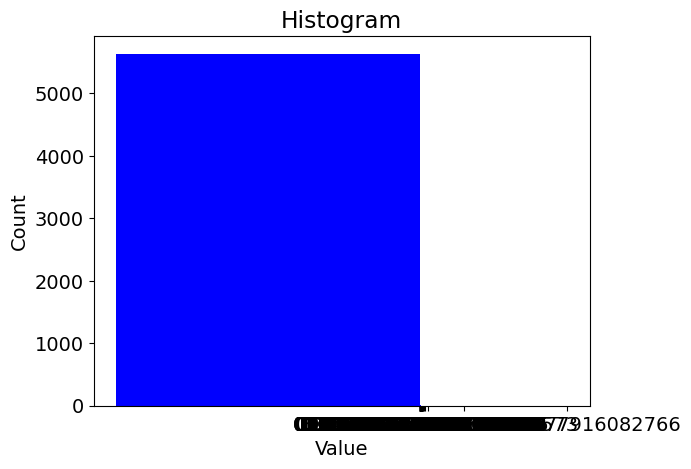


NW 2014 DEGREE CENTRALITY
The mean degree centrality is 0.0003604031193179482, with stdev 0.0037663991990287368
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.38432772395036546
The minimum node is recall for german, with value 8.499065102838688e-05
(0.38432772395036546, 0.1289308176100629, 0.018442971273159952, 0.018187999320074793, 0.01283358830528642, 0.010963793982661908, 0.01087880333163352, 0.010538840727519972, 0.009688934217236104, 0.008669046404895462, 0.007054224035356111, 0.0068842427332993375, 0.00679925208227095, 0.006714261431242563, 0.006629270780214177, 0.006204317525072242, 0.005779364269930308, 0.005694373618901921, 0.005609382967873534, 0.005524392316845147, 0.00543940166581676, 0.0053544110147883735, 0.005269420363759986, 0.005014448410674826, 0.004674485806561279, 0.004419513853476118, 0.004164541900390957, 0.00407955124936257, 0.003994560598334183, 0.0038245792962774095, 0.0037395886452490225, 0.003484616692163862, 0.00331463539

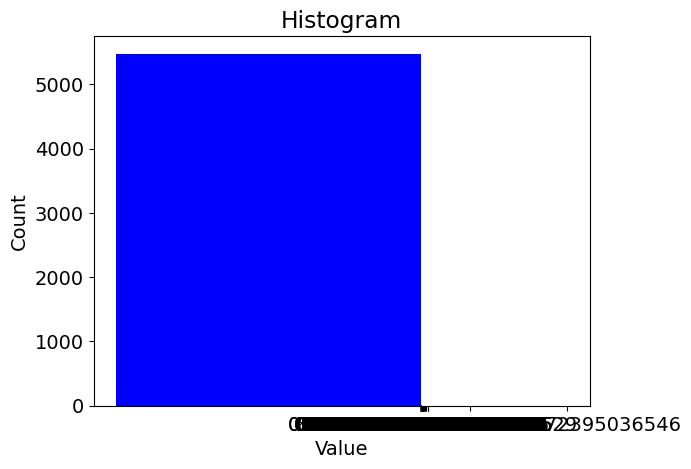


NW 2015 DEGREE CENTRALITY
The mean degree centrality is 0.0003750686577286427, with stdev 0.003945170610724388
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.3906833457804332
The minimum node is many approach deal with both most of both problem, with value 9.335324869305452e-05
(0.3906833457804332, 0.1126773711725168, 0.014376400298730397, 0.01176250933532487, 0.009241971620612398, 0.008495145631067963, 0.00802837938760269, 0.006628080657206871, 0.006254667662434653, 0.0060679611650485445, 0.00597460791635549, 0.005507841672890217, 0.004574309185959672, 0.004480955937266617, 0.004294249439880508, 0.004107542942494399, 0.004014189693801345, 0.003734129947722181, 0.0036407766990291263, 0.0034540702016430174, 0.003360716952949963, 0.0032673637042569086, 0.0031740104555638537, 0.0030806572068707992, 0.002987303958177745, 0.0028939507094846903, 0.002800597460791636, 0.002707244212098581, 0.0026138909634055266, 0.002520537714712472, 0.0024271844660194177,

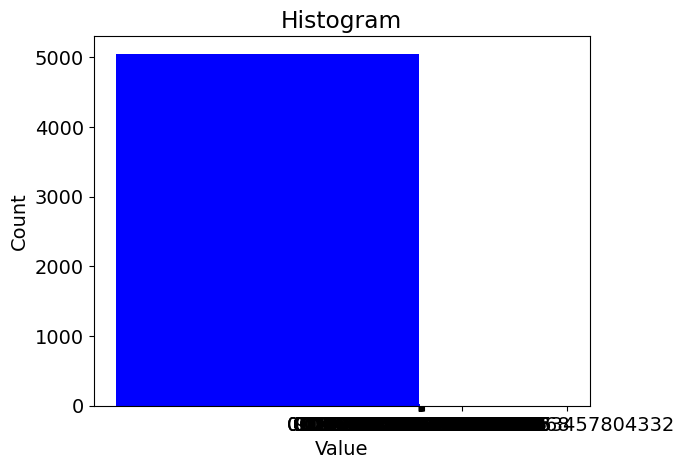


NW 2016 DEGREE CENTRALITY
The mean degree centrality is 0.0004031119135801923, with stdev 0.004104942290973663
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.3947787963332005
The minimum node is it achieves high accuracy in predicting users activities by basing tensor factorization on the semantics behind item categories, with value 9.964129135113592e-05
(0.3947787963332005, 0.10731367078517338, 0.022718214428058988, 0.011757672379434038, 0.011458748505380631, 0.006377042646472699, 0.006078118772419291, 0.005779194898365883, 0.0051813471502590676, 0.00488242327620566, 0.004782781984854524, 0.004683140693503388, 0.004583499402152252, 0.004483858110801116, 0.004284575528098845, 0.004085292945396573, 0.0039856516540454365, 0.003786369071343165, 0.0036867277799920288, 0.003587086488640893, 0.003487445197289757, 0.003387803905938621, 0.0032881626145874854, 0.0031885213232363493, 0.0030888800318852132, 0.0029892387405340776, 0.0027899561578318055, 0.00269

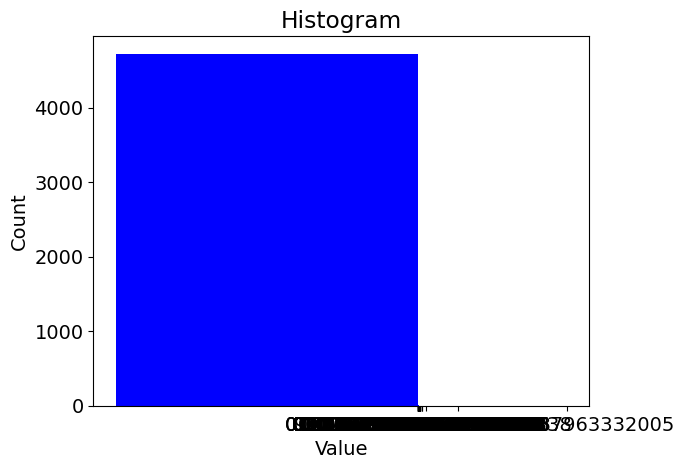


NW 2017 DEGREE CENTRALITY
The mean degree centrality is 0.0003257201444082481, with stdev 0.0036616059563505457
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.39666561811890527
The minimum node is map image, with value 7.864108210128971e-05
(0.39666561811890527, 0.10758100031456433, 0.018244731047499213, 0.010066058508965083, 0.008965083359547026, 0.007313620635419943, 0.006999056307014784, 0.006763133060710915, 0.005740798993394149, 0.00550487574709028, 0.005190311418685121, 0.004561182761874803, 0.004325259515570934, 0.0042466184334696445, 0.004167977351368354, 0.003932054105064486, 0.003853413022963196, 0.0037747719408619063, 0.0036174897766593265, 0.003460207612456747, 0.0033815665303554574, 0.0033029254482541677, 0.003224284366152878, 0.0031456432840515883, 0.002988361119849009, 0.002909720037747719, 0.00275243787354514, 0.00267379679144385, 0.0025165146272412707, 0.002437873545139981, 0.0023592324630386913, 0.0022805913809374016, 0.00220195029

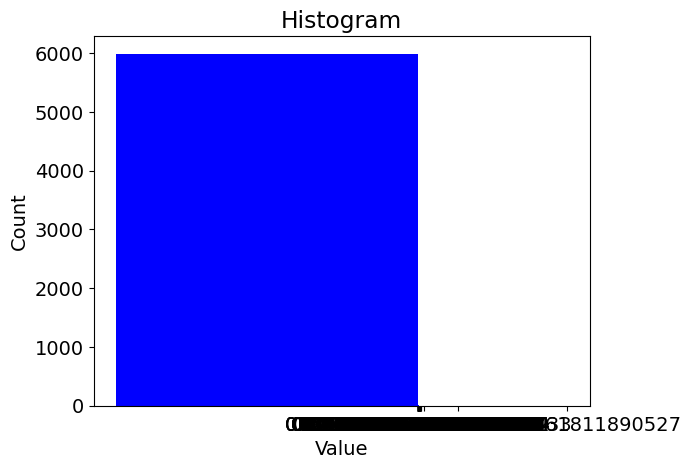


NW 2018 DEGREE CENTRALITY
The mean degree centrality is 0.00035200556538775133, with stdev 0.0037045886121874713
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.37570188871873406
The minimum node is preprocessing in datalog, with value 8.507742045261188e-05
(0.37570188871873406, 0.1367194146673473, 0.010209290454313426, 0.00952867109069253, 0.009188361408882083, 0.00816743236345074, 0.007827122681640293, 0.007571890420282458, 0.006380806533945891, 0.005785264590777607, 0.005700187170324996, 0.0055300323294197725, 0.005019567806704101, 0.004679258124893653, 0.0045091032839884295, 0.004338948443083206, 0.0041687936021779825, 0.00408371618172537, 0.0038284839203675345, 0.0037434064999149227, 0.0035732516590096988, 0.003403096818104475, 0.0033180193976518634, 0.0032329419771992517, 0.0031478645567466395, 0.0030627871362940277, 0.0028926322953888037, 0.002807554874936192, 0.00272247745448358, 0.0026374000340309684, 0.0025523226135783566, 0.002467245193125

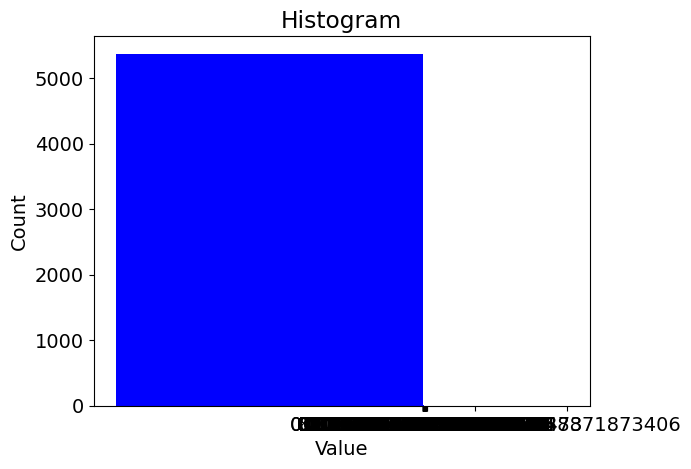


NW 2019 DEGREE CENTRALITY
The mean degree centrality is 0.0003311135841256543, with stdev 0.0036839463158106953
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.39099641810485186
The minimum node is we experiments show that a lightweight extension of existing interfaces enable efficient skyline query processing over knowledge graphs, with value 8.140670791273201e-05
(0.39099641810485186, 0.11152718984044285, 0.010989905568218822, 0.01090849886030609, 0.008710517746662325, 0.00805926408336047, 0.007896450667535006, 0.006919570172582221, 0.006186909801367633, 0.005861282969716705, 0.005779876261803973, 0.005617062845978509, 0.005128622598502117, 0.004640182351025725, 0.004395962227287529, 0.004233148811462065, 0.0040703353956366, 0.0039075219798111365, 0.0038261152718984046, 0.0036633018560729407, 0.003581895148160209, 0.0035004884402474764, 0.0034190817323347445, 0.0033376750244220126, 0.0032562683165092807, 0.0031748616085965488, 0.0030120481927710845

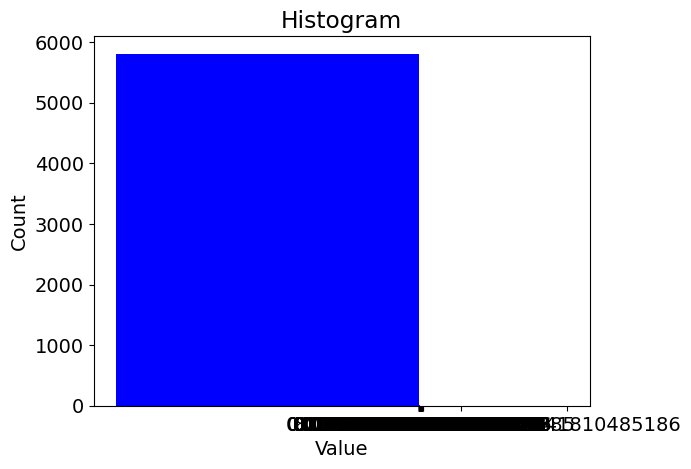


NW 2020 DEGREE CENTRALITY
The mean degree centrality is 0.00037517528626885, with stdev 0.003991098988219094
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.39587454083074314
The minimum node is symbolic space, with value 9.418856550814731e-05
(0.39587454083074314, 0.10530281623810869, 0.010266553640388056, 0.009230479419798437, 0.008947913723273995, 0.008382782330225111, 0.007629273806159932, 0.00734670810963549, 0.006593199585570312, 0.006310633889045869, 0.005839691061505133, 0.005745502495996986, 0.005651313930488839, 0.00489780540642366, 0.004803616840915513, 0.0044268625788829235, 0.0042384854478666285, 0.004144296882358482, 0.004050108316850334, 0.0038617311858340398, 0.003673354054817745, 0.0034849769238014506, 0.003390788358293303, 0.003296599792785156, 0.0032024112272770085, 0.0031082226617688614, 0.0029198455307525664, 0.0027314683997362718, 0.0026372798342281247, 0.002543091268719977, 0.00244890270321183, 0.0023547141377036826, 0.00226052

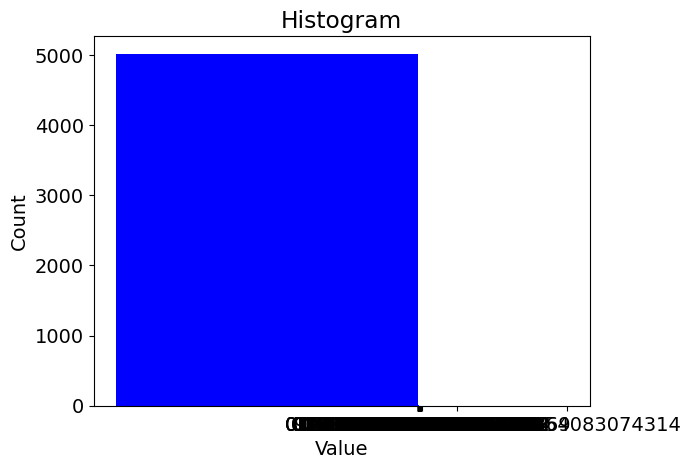


NW 2021 DEGREE CENTRALITY
The mean degree centrality is 0.0004894440515823329, with stdev 0.004653301358735987
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.4025243689077731
The minimum node is same topk important nod, with value 0.00012496875781054737
(0.4025243689077731, 0.09922519370157462, 0.015621094726318422, 0.009497625593601601, 0.008372906773306673, 0.007498125468632842, 0.0067483129217695585, 0.006373406648337916, 0.005998500374906274, 0.0058735316170957265, 0.005623594101474632, 0.005498625343664084, 0.005373656585853537, 0.004623844038990253, 0.004498875281179706, 0.004373906523369158, 0.004248937765558611, 0.004123969007748063, 0.003999000249937516, 0.003749062734316421, 0.0036240939765058737, 0.0034991252186953262, 0.0033741564608847792, 0.003249187703074232, 0.0031242189452636844, 0.002999250187453137, 0.0028742814296425895, 0.002749312671832042, 0.0026243439140214947, 0.0024993751562109477, 0.0023744063984004003, 0.00224943764058985

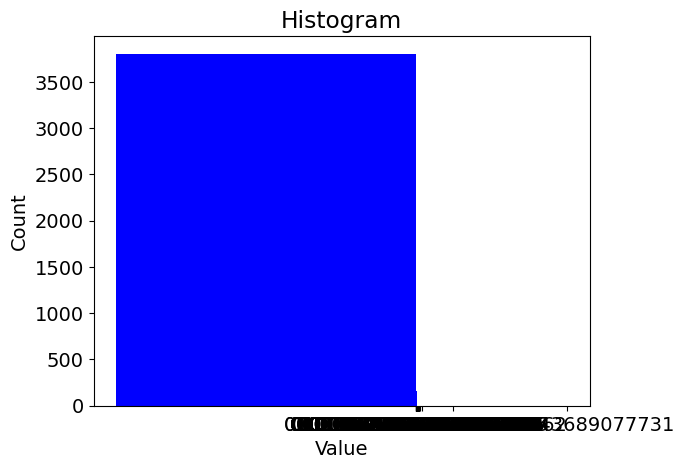


NW 2002 PAGERANK
The mean network pagerank is 0.00012561236025624992, with stdev 0.0012300523168182022
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10905339769121385
The minimum node is http://local/local.owl#s2002.109.1, with value 7.751331352527496e-05
(0.10905339769121385, 0.011791196044633865, 0.0026399844828031323, 0.0016484025735844655, 0.001626930964780742, 0.0013029108603429178, 0.0011981183920938374, 0.0011771690486751304, 0.0011556112291693874, 0.0009880901921538621, 0.0009712182635450514, 0.0009620774383425341, 0.0009244814446830538, 0.0008439357935241231, 0.0007802090758271981, 0.0007765301883386653, 0.0007699468706191593, 0.0007344382936900543, 0.0006737570307416147, 0.0006722426613891146, 0.0006618004605882459, 0.0006580753969375632, 0.0006575047286343013, 0.0006467317070032834, 0.0006450242386536477, 0.0006440187516165584, 0.0006429790625356633, 0.000637423041057266, 0.0006118958095609435, 0.0005825519603525179, 0.000580888069718903

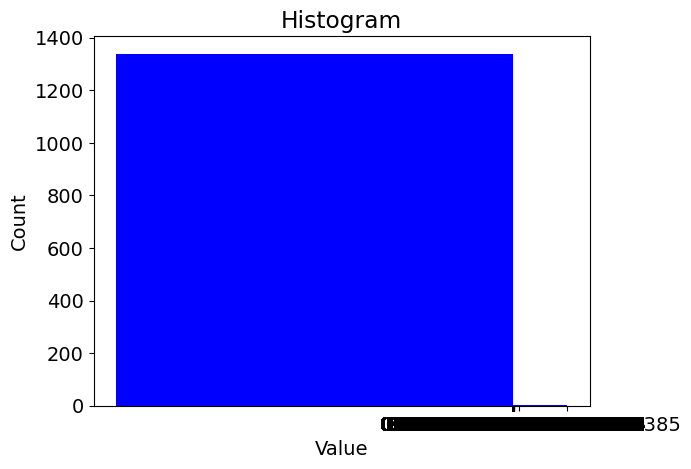


NW 2003 PAGERANK
The mean network pagerank is 8.641548565502969e-05, with stdev 0.0009980490177901623
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10659684853960402
The minimum node is http://local/local.owl#s2003.549.1, with value 5.306502810898109e-05
(0.10659684853960402, 0.012210506903443432, 0.0017441348242722195, 0.0016224543981214385, 0.0013568292090200237, 0.0011986284249245868, 0.0011251345366879728, 0.001076609795779286, 0.000965758800491959, 0.0009238889016835232, 0.0008921117012727469, 0.0008825510177869317, 0.0008713702127981418, 0.0008476748538649886, 0.0007925015769233908, 0.0007868082412628584, 0.0007792917119336533, 0.0007654739457874066, 0.0007480113537878947, 0.0007241061027983481, 0.0007157011336913331, 0.0006869940951426087, 0.0006284949614035886, 0.0006233876355887005, 0.0006051646440304097, 0.0005979955114643373, 0.000580003671635694, 0.0005533924418686529, 0.0005446233484771186, 0.000544050310063802, 0.0005431349934930521, 

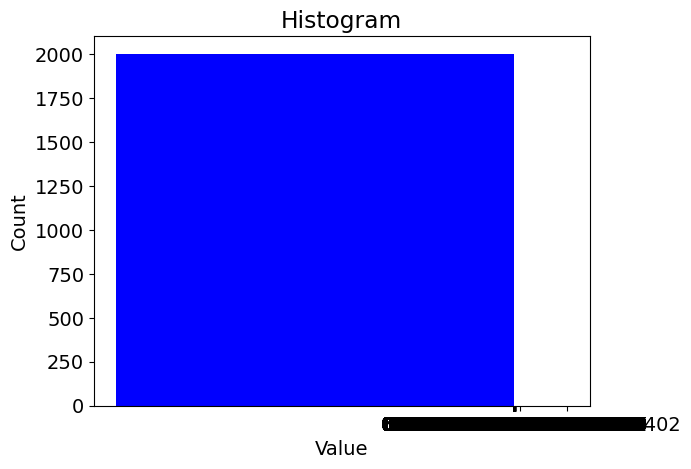


NW 2004 PAGERANK
The mean network pagerank is 7.870916961826227e-05, with stdev 0.0009592507691966499
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10725601138143079
The minimum node is http://local/local.owl#one_approach_to_problem, with value 4.8345691247683915e-05
(0.10725601138143079, 0.01311186274699265, 0.0020610533100245032, 0.0018093424188065992, 0.00153093374718051, 0.00119411176372501, 0.0011437424129297927, 0.0011285623949067651, 0.000898185611781965, 0.0008107590972745433, 0.0007875737385406617, 0.0007862423337919317, 0.0007731643460684328, 0.0006757967775989857, 0.000652622714358461, 0.0006173801344329251, 0.0006138145790363017, 0.0006082509639711624, 0.0005819796671789007, 0.00057124449392164, 0.0005681349444681187, 0.0005424853431885043, 0.0005350451542931826, 0.0005220633781519278, 0.0005178754079877984, 0.000515962857555086, 0.0004990831578246512, 0.0004675725094242298, 0.00046246428772810517, 0.00045576415814052877, 0.000451275161

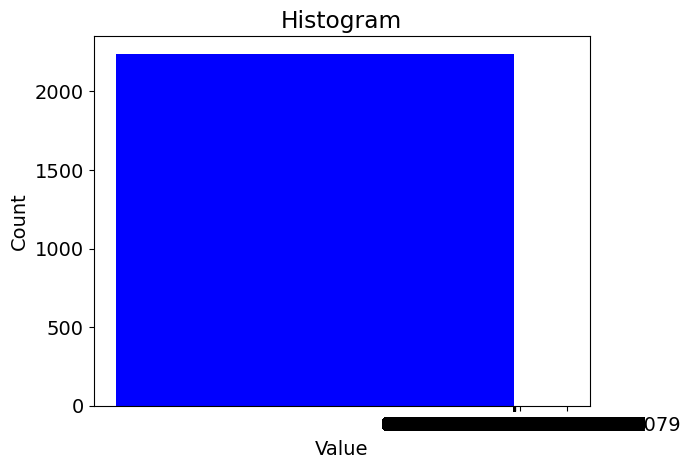


NW 2005 PAGERANK
The mean network pagerank is 7.284382284382229e-05, with stdev 0.0009132289260529092
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10611248605099151
The minimum node is http://local/local.owl#automatically_happen_for_enrich_content, with value 4.468837182925496e-05
(0.10611248605099151, 0.012959871444502953, 0.002643132355505955, 0.0016496261561043074, 0.001574890895072627, 0.0011271755658694412, 0.001118203871280023, 0.0010837209060967606, 0.001014432377605352, 0.000890402217651009, 0.0008700085887150616, 0.0007756068937085632, 0.0007316701850928793, 0.0007266320924395471, 0.0007263271980326208, 0.0007000939519808646, 0.0006930219384229425, 0.0006890306613793265, 0.0006296139932008924, 0.0006150930550734005, 0.0006140066667758634, 0.0006046735083305497, 0.0005940188112480551, 0.0005859113231418423, 0.0005806491150610636, 0.0005641063389576717, 0.000525561585077251, 0.0005118488198701712, 0.0005077027219320149, 0.000506706200894592

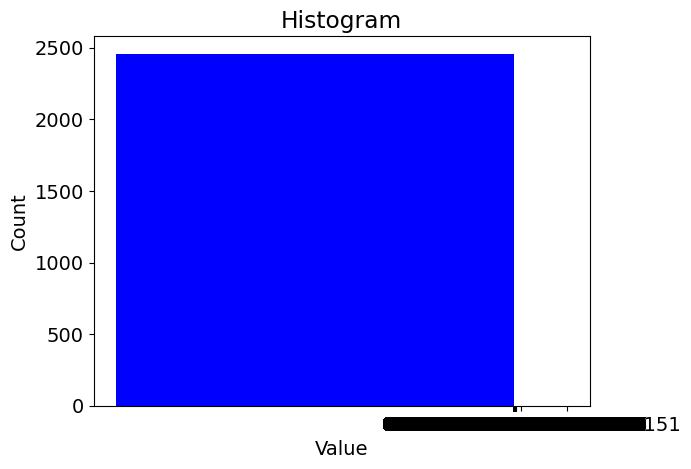


NW 2006 PAGERANK
The mean network pagerank is 7.583801001061823e-05, with stdev 0.0009355749813370613
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10659441288308676
The minimum node is http://local/local.owl#s2006.529.1, with value 4.6488176183686305e-05
(0.10659441288308676, 0.012630077611905965, 0.002365447267338552, 0.0016310802613739568, 0.0015341712461865208, 0.0014152163424841632, 0.001228984772649464, 0.0012051799341092626, 0.0010236886404285566, 0.0008616832844430396, 0.000811879535027722, 0.0008091865312978095, 0.0007473829462967131, 0.0007356083605795192, 0.0007167567830704988, 0.0007081953213999778, 0.0007023648704948399, 0.0006795191893883631, 0.0006684700481929258, 0.0006618906279396936, 0.000657116815362415, 0.0006473596365644003, 0.0006365804612387228, 0.0006129798996731464, 0.0006111412158265263, 0.0005900027240134935, 0.0005783841343451273, 0.0005676887350996158, 0.00056196429011618, 0.0005595289258197728, 0.0005529977367223177, 0

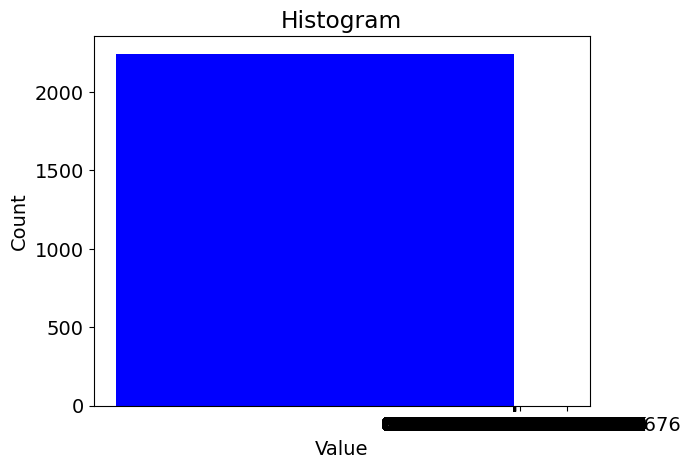


NW 2007 PAGERANK
The mean network pagerank is 9.460737937559059e-05, with stdev 0.0010669560022823483
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10903005393629694
The minimum node is http://local/local.owl#s2007.482, with value 5.8409062358786764e-05
(0.10903005393629694, 0.011390078370501973, 0.0026061651686623694, 0.0018453980811773175, 0.0014074457217860012, 0.0013084205948168046, 0.0012755875604086517, 0.0011351432037084404, 0.0010889645041104847, 0.0010567298656805238, 0.0008994899408202387, 0.0008726193090116029, 0.0008149072166937099, 0.0007094072102986912, 0.0007020253824592932, 0.0006721724359717521, 0.0006419625469166864, 0.000638111278638544, 0.000636326804766343, 0.0006239928241314112, 0.0006232913710898789, 0.0006037787607743163, 0.0005834332797093106, 0.0005658333678175442, 0.0005452704767620793, 0.0005196751218862766, 0.000518238064903463, 0.0004800361494994451, 0.00047714111962635867, 0.0004757406232115369, 0.00047497630552863207

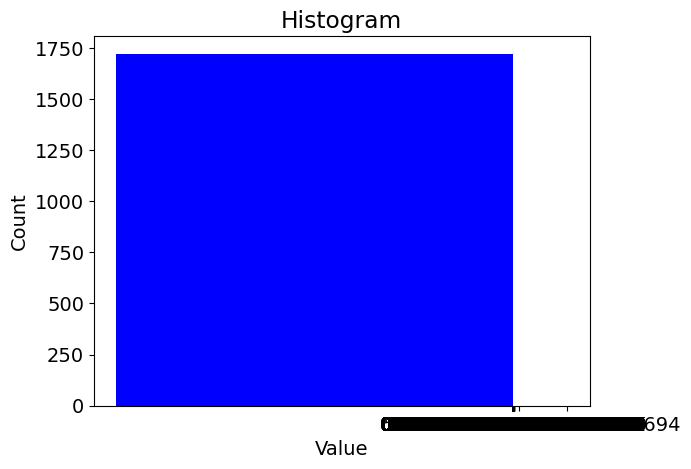


NW 2008 PAGERANK
The mean network pagerank is 8.767315448010454e-05, with stdev 0.0010183080236275414
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10803003498667971
The minimum node is http://local/local.owl#s2008.244.4, with value 5.3931883097872114e-05
(0.10803003498667971, 0.011899307725992441, 0.0025065269218851947, 0.001895940528772324, 0.001409234653068867, 0.0013932806730257527, 0.0010932782748584928, 0.00108314499842461, 0.0008967850442915545, 0.0008304469858556031, 0.0008121122058543724, 0.0007453309672831111, 0.0007352508687021252, 0.000671328300229161, 0.0006570494167334707, 0.0006321809417574241, 0.0006271033906372174, 0.000625384546190912, 0.0006052164339294026, 0.0006023500703037409, 0.0005927386727261481, 0.0005908347006702568, 0.0005740961426141022, 0.000572701123729884, 0.0005652494591783982, 0.0005540217089848138, 0.0005392514056080444, 0.0005241130042789624, 0.0005189075536637727, 0.0005074484870608269, 0.0005056933826914971, 0.

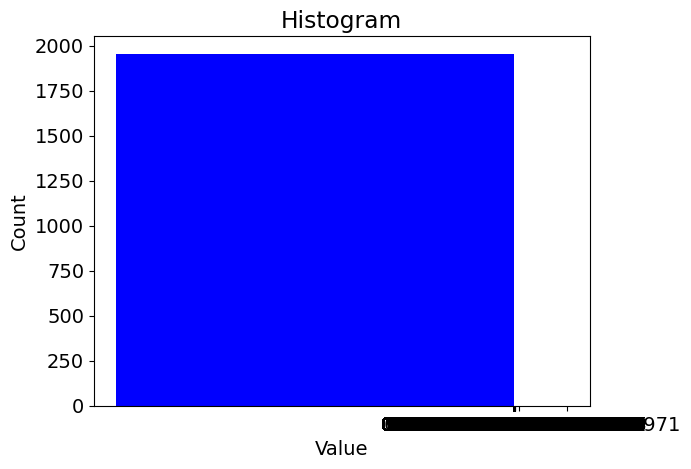


NW 2009 PAGERANK
The mean network pagerank is 8.253549026081213e-05, with stdev 0.0009731039886369619
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10619204693025928
The minimum node is http://local/local.owl#s2009.203.2, with value 5.069507971264423e-05
(0.10619204693025928, 0.013316776192738503, 0.0023561280354022487, 0.0019477498674308332, 0.001686425745671474, 0.0013047402349075068, 0.001184166700564423, 0.0011665923428938805, 0.0011252064876389088, 0.0008767272425036563, 0.0008582283843884815, 0.0008573406994087452, 0.0008007369722096631, 0.0006980355091320347, 0.0006879667006878834, 0.0006834977523068181, 0.0006361789520990491, 0.000618807268185032, 0.0005980181649736319, 0.0005973997683135846, 0.0005913060331799715, 0.0005842729997468623, 0.0005660510024478549, 0.0005614273154601132, 0.0005563719116017475, 0.0005562530482100107, 0.0005488946618291889, 0.0005383935281667667, 0.0005376020789321335, 0.0005322548819701833, 0.000520237180281757, 

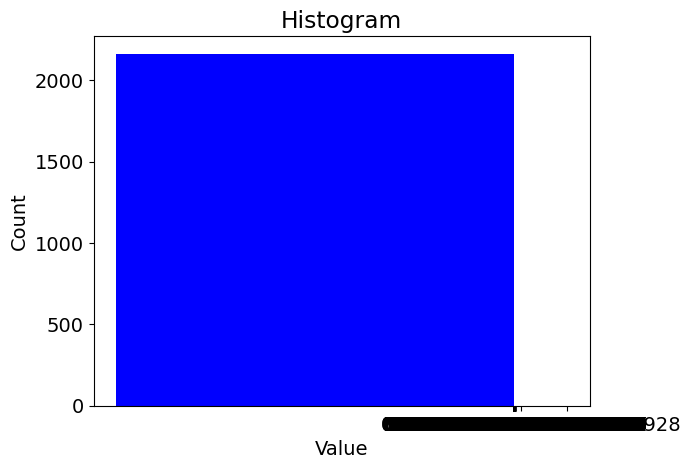


NW 2010 PAGERANK
The mean network pagerank is 7.841292244961964e-05, with stdev 0.000954536983281095
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10692892419943328
The minimum node is http://local/local.owl#s2010.144.2, with value 4.815572505423845e-05
(0.10692892419943328, 0.012924750603699499, 0.0024094416993722515, 0.0018502068320323272, 0.0017381439845753166, 0.0012940576787586117, 0.001274899643736995, 0.0010937676658682248, 0.0010298231307551, 0.000912795302686576, 0.0009082111105183212, 0.0008127058340390007, 0.000783899404313703, 0.0007733613305079287, 0.0006785578055314745, 0.0006680412596943353, 0.0006502595644932931, 0.0006461421607588169, 0.0006392572685301241, 0.0006354664036988145, 0.0005792253890285925, 0.0005788590108960094, 0.0005701437842383071, 0.0005656056388167676, 0.0005146939559382182, 0.0005048410800318086, 0.0004816833746793998, 0.00047481658586236717, 0.00047408607258697514, 0.0004699301016738735, 0.0004628294074621729, 0

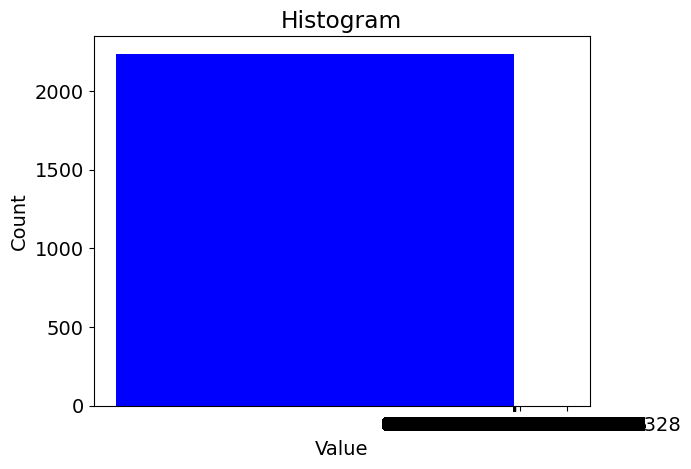


NW 2011 PAGERANK
The mean network pagerank is 7.613247049866478e-05, with stdev 0.0009486554666416048
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.1079633512574145
The minimum node is http://local/local.owl#s2011.347, with value 4.6797046797255394e-05
(0.1079633512574145, 0.012228696158366388, 0.0020623340217144266, 0.0019142557035048955, 0.0013436139583798653, 0.001270962856341697, 0.0012558935357374443, 0.0010668466891678155, 0.0008993442578858161, 0.0008434003055926688, 0.0007930341602440971, 0.0007610651132002471, 0.0007101436111859909, 0.0007068882145116439, 0.0007009626138719461, 0.0006101329654774786, 0.0005836077851428268, 0.000572337076768727, 0.000569130909235736, 0.0005641236720881651, 0.0005616190621828295, 0.0005076195431017571, 0.0004997796151686808, 0.000496033628483317, 0.0004951597688717054, 0.0004883395740471498, 0.0004880637182891902, 0.0004711077605060855, 0.0004588106043582209, 0.00044922683128031986, 0.0004473636370713942, 0.

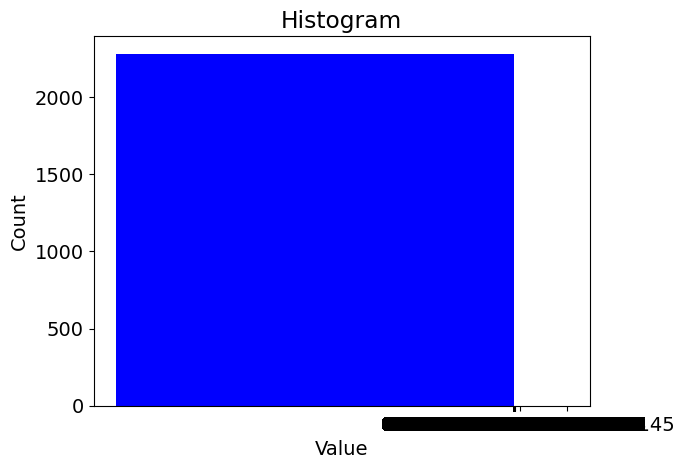


NW 2012 PAGERANK
The mean network pagerank is 8.880206020779472e-05, with stdev 0.0010367755702486807
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10931760643443006
The minimum node is http://local/local.owl#s2012.478.2, with value 5.48161227393216e-05
(0.10931760643443006, 0.011985940243711765, 0.0020955428068046523, 0.001710723656737023, 0.0012672040482788597, 0.0011266105013024413, 0.0011147664659130936, 0.001097702256094839, 0.0010722597114118974, 0.0010453281699219553, 0.0009139209029748913, 0.0007696282253437602, 0.0007051046321193716, 0.0006839030337491826, 0.0006755791282012885, 0.0006605121760541847, 0.0006454354059543185, 0.000577786780864833, 0.0005208726422715247, 0.0005144190159285777, 0.0005075911428005907, 0.0005043821715870063, 0.0004999132467461313, 0.0004888920948433995, 0.00048772727948670003, 0.00048510279976193415, 0.0004681178352870378, 0.00046671727717253515, 0.0004621211599340432, 0.00046199436848804153, 0.00046018945705385

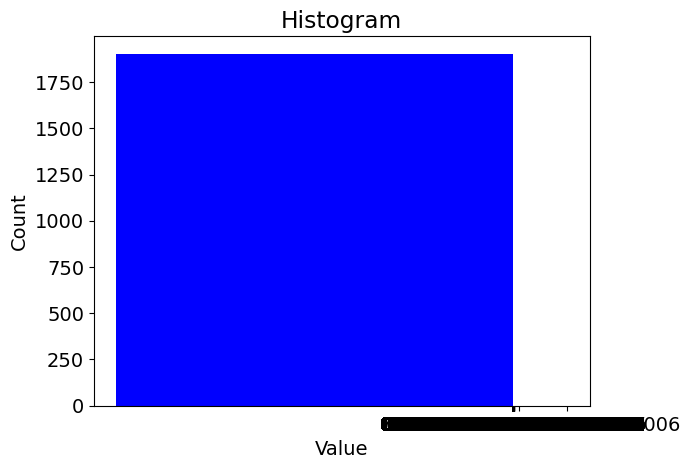


NW 2013 PAGERANK
The mean network pagerank is 8.242664029013446e-05, with stdev 0.0009850117617114676
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10766605196380437
The minimum node is http://local/local.owl#s2013.12.1, with value 5.050718824769156e-05
(0.10766605196380437, 0.012627471617589807, 0.0021768356148245877, 0.0020951937460081285, 0.001997723647945437, 0.0013295558014991887, 0.0011599775809062107, 0.0011329374321495914, 0.0009724677612236468, 0.0009689060135987083, 0.0009641955995434575, 0.0009243683502041081, 0.0008953077636958975, 0.0008778356704745166, 0.0008223800166327685, 0.0007670000880287318, 0.0007371216239603851, 0.0006899483861594165, 0.0006720871964259565, 0.0006613039156759069, 0.0006053005328277624, 0.0005997682095073353, 0.0005900420698794044, 0.000542043368943394, 0.0005414911960319433, 0.0005310283142284601, 0.0005293857855154358, 0.0005160660036604567, 0.000488740576218774, 0.0004588243666349581, 0.00045451549341436395,

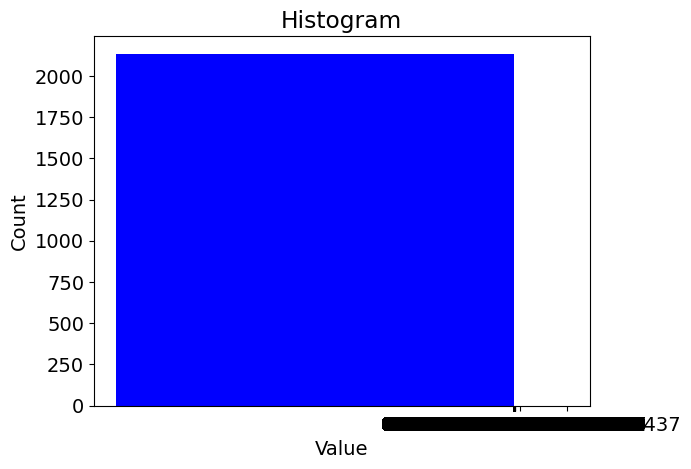


NW 2014 PAGERANK
The mean network pagerank is 8.498342823148949e-05, with stdev 0.0010046758715556647
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10801538637719786
The minimum node is http://local/local.owl#s2014.366.2, with value 5.180467149915302e-05
(0.10801538637719786, 0.013409116976570573, 0.0033855885291587014, 0.0017799056448966817, 0.001562022989472201, 0.0014667838822928641, 0.0014367085071937504, 0.0013454788191776127, 0.0012606896946808586, 0.0011587215084811733, 0.0010115390705065523, 0.0009724707324464586, 0.0009164634843303263, 0.0008175993930368246, 0.0008073638106718494, 0.0007854198510915648, 0.0007769453263973888, 0.0007714153005794946, 0.0007622611567502322, 0.0007369970483791249, 0.0007130833092032821, 0.0006978594387820774, 0.0006953633022464446, 0.0006685613527611841, 0.0006448906926939965, 0.0006424492242804122, 0.0006260732742393801, 0.0006231848011829401, 0.000622914738804321, 0.0006039707323954425, 0.0005848443317013161

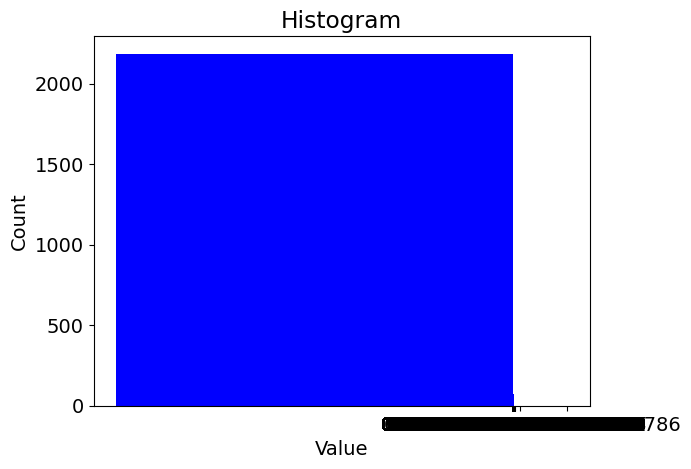


NW 2015 PAGERANK
The mean network pagerank is 9.334453467750017e-05, with stdev 0.0010590024649666653
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.1088781050209721
The minimum node is http://local/local.owl#s2015.28.2, with value 5.760379554485892e-05
(0.1088781050209721, 0.012283568131879596, 0.0018540999106488475, 0.001558782227131104, 0.0014302714883257601, 0.0013008704307184956, 0.0010874537390200437, 0.0010002656220430236, 0.0009855403088542872, 0.0009436906317212085, 0.0008477553802764922, 0.0008284584869067818, 0.0007445114239199924, 0.0007108680614846823, 0.0006906528573326514, 0.000673843912796648, 0.0006548200078094566, 0.0006542117998987668, 0.0006424788051401988, 0.0005960104745252255, 0.0005702805717198627, 0.0005553538227403065, 0.0005108804769692837, 0.0005077241972004111, 0.0004772295920564149, 0.00047152926101192674, 0.0004702153561786548, 0.0004590460969712318, 0.00044809908151391073, 0.00044559760203535066, 0.0004344471862006316

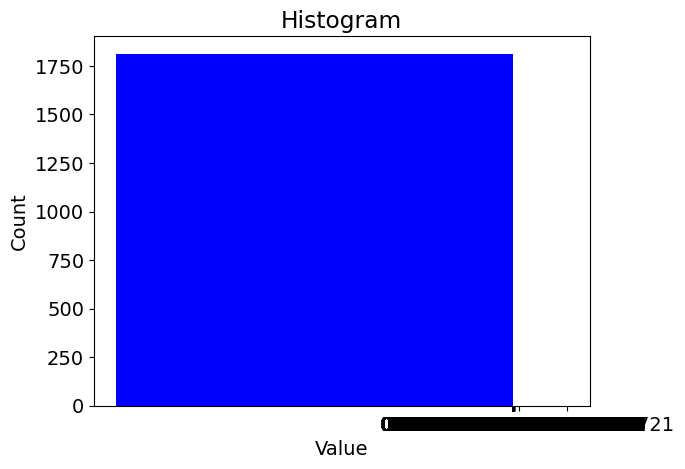


NW 2016 PAGERANK
The mean network pagerank is 9.963136395337615e-05, with stdev 0.001092637644428106
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10881505462011691
The minimum node is http://local/local.owl#s2016.89, with value 6.140134251204866e-05
(0.10881505462011691, 0.01141256633206422, 0.0022851530541157547, 0.0019891208608933376, 0.0015887358845749723, 0.0009967759700632698, 0.0009923639976876955, 0.0009668225865971765, 0.0008976120567208713, 0.0008464735371899046, 0.0007549338122681618, 0.0007179989691671923, 0.000716319089533915, 0.0007028243762922893, 0.0007017828852566278, 0.0006894024642072615, 0.0006837586080867164, 0.0006743609086653681, 0.000666334600731548, 0.0006381500631894995, 0.0006311717438796397, 0.000579951714651774, 0.0005771212892185705, 0.0005706845578307458, 0.0005439883326239839, 0.0005307601660410707, 0.0005292962832614936, 0.0005073598773962634, 0.0005062490693768574, 0.0004958427407677211, 0.0004945015736540509, 0.00

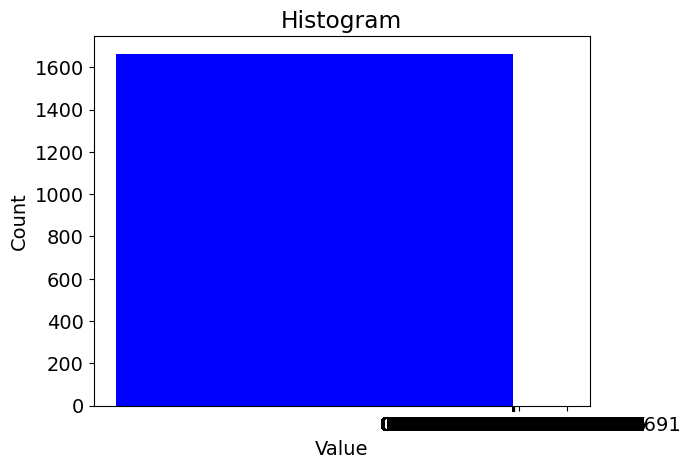


NW 2017 PAGERANK
The mean network pagerank is 7.863489816780968e-05, with stdev 0.0009667712628224335
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10835607974096102
The minimum node is http://local/local.owl#s2017.374.3, with value 4.821495196383451e-05
(0.10835607974096102, 0.01154076610639967, 0.0017965106572276589, 0.0015617896839588599, 0.001159141316487021, 0.0010798883294986536, 0.0010715553754887647, 0.0009602128491238638, 0.0009156552900782207, 0.0008610651659186751, 0.0007812442139904154, 0.0007205772133596726, 0.0006986577926848371, 0.0006838377136405373, 0.0006799719202496275, 0.0006321443199863083, 0.0006260329628421306, 0.0006250896732318224, 0.0006005930233600986, 0.0005669004058525009, 0.0005573270946065147, 0.0005281979578004759, 0.0005255413691963677, 0.0005195556321052851, 0.0005127103751692992, 0.0004977022084657616, 0.0004973025662378061, 0.0004945944755779113, 0.0004797998874131022, 0.00047665303916468913, 0.000474857796646944

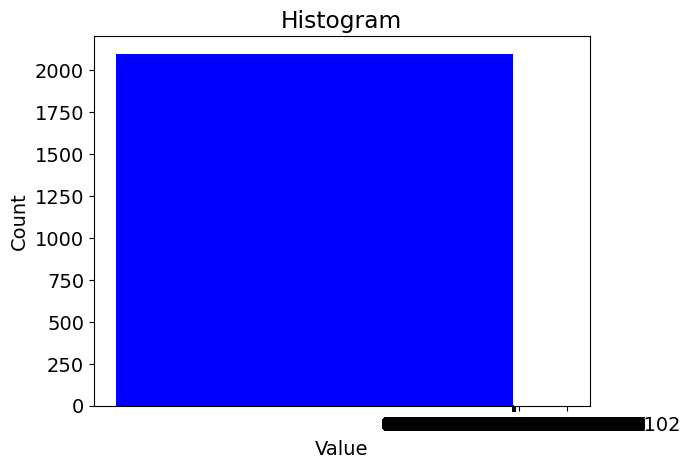


NW 2018 PAGERANK
The mean network pagerank is 8.507018290089507e-05, with stdev 0.0009859859328837288
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10567168450453614
The minimum node is http://local/local.owl#central_name_authority_on_semantic_web, with value 5.190003540461971e-05
(0.10567168450453614, 0.015701260859997283, 0.0015275962100055975, 0.0012732606515068164, 0.0012649863252715361, 0.0012443976986154298, 0.0012377553217418067, 0.0012076277163789347, 0.0009711805023374246, 0.0009689202709239041, 0.0009530763591009721, 0.0008909647853769486, 0.0007892566526389751, 0.000774481448987728, 0.0007632084415029703, 0.0007554097814424577, 0.0007066873070193854, 0.0006968265619782695, 0.0006766148951282732, 0.000642735018211642, 0.0006330215570029846, 0.0006308467520874736, 0.0005970394282332739, 0.0005937372554309654, 0.0005856262004147558, 0.0005842650609650546, 0.0005774016231332974, 0.0005755527836339323, 0.0005669556903366051, 0.000561274487171

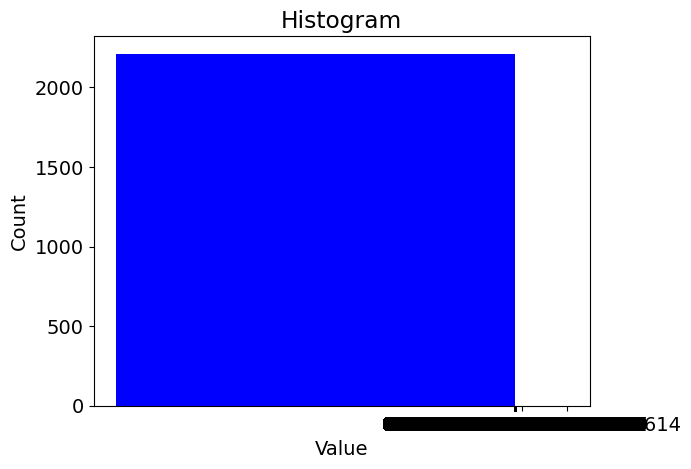


NW 2019 PAGERANK
The mean network pagerank is 8.140008140008321e-05, with stdev 0.0009797086290535112
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10781943025845776
The minimum node is http://local/local.owl#s2019.481, with value 5.010016680578907e-05
(0.10781943025845776, 0.012358544054821142, 0.0015780059614230561, 0.0014143511521272777, 0.0013454701007079035, 0.001332773636968924, 0.0010641276904173906, 0.001047756003817417, 0.0010449672876045686, 0.001037376717869623, 0.0010096166222127194, 0.0010054503139896413, 0.0008626913082752274, 0.0008321228625478168, 0.0007227854348100321, 0.0007190556821823696, 0.0007164510454440897, 0.0007063070649031422, 0.0006521405169615476, 0.0006512264552822992, 0.0006453010107127313, 0.0006185380249563925, 0.0006037839716863361, 0.0006027838503344756, 0.0005980187381877903, 0.0005762323188243346, 0.0005647500180948577, 0.0005363931109430683, 0.0005244005430487146, 0.000504961973363043, 0.0005044286386599883, 0.

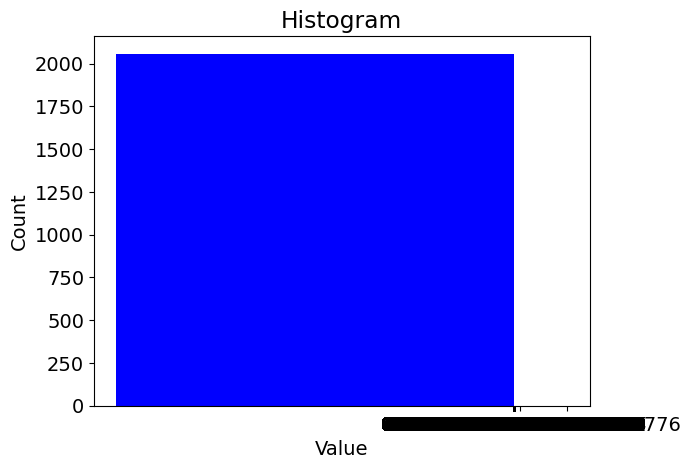


NW 2020 PAGERANK
The mean network pagerank is 9.417969485779044e-05, with stdev 0.0010665742108836975
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.10925135901643643
The minimum node is http://local/local.owl#s2020.195, with value 5.823759887189666e-05
(0.10925135901643643, 0.011530611278769651, 0.001516631633631026, 0.0013704655423820036, 0.001323270528888021, 0.0012817538902284624, 0.001256108471941212, 0.0012534085742516965, 0.001151458264715873, 0.0010929341569274069, 0.0009536794893045407, 0.0008691893494484578, 0.0008524006766257252, 0.0007895908965862138, 0.000698158859446875, 0.0006971428179018363, 0.000683058191333816, 0.0006289312020916043, 0.0006258190656433123, 0.0006086704408638857, 0.0006012783175413237, 0.0006006157108949705, 0.0005987440806446202, 0.0005898797957242456, 0.0005874601064749319, 0.000587261632145733, 0.0005720417861697937, 0.0005719666060106012, 0.0005541543160819399, 0.0005404036238614692, 0.0005367313650320854, 0.000

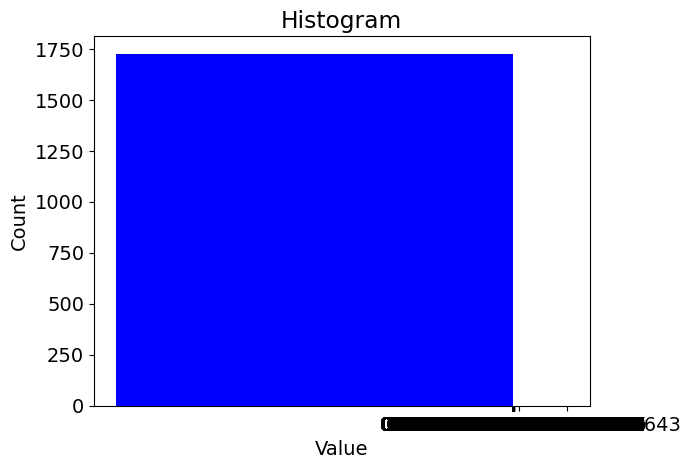


NW 2021 PAGERANK
The mean network pagerank is 0.0001249531425715415, with stdev 0.001242267607501455
The maximum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.11057456918704882
The minimum node is http://local/local.owl#same_topk_important_nod, with value 7.736701496726637e-05
(0.11057456918704882, 0.010916354844849898, 0.001554949493562151, 0.001543007123515688, 0.001345570741710599, 0.0013267464290629993, 0.0011905919666860606, 0.001159377218366319, 0.0010593701242086388, 0.001000278817295175, 0.0008873610429962419, 0.0008466241878415555, 0.0008274286242516765, 0.0007902900920566519, 0.0007749255552662213, 0.0007396208527047422, 0.0007359578688992583, 0.0007246888850967734, 0.0007074911326308802, 0.0006734668308589724, 0.0006480796633734348, 0.0006436398529662624, 0.0006311691821366115, 0.0006255162035725137, 0.0006145453313632506, 0.0006035775292766925, 0.0005910123026921122, 0.0005713517935293656, 0.0005700588541027003, 0.000559473915662446, 0.000552734880

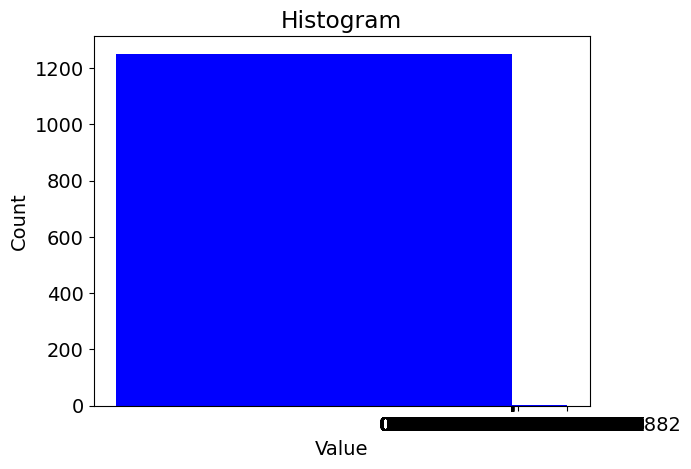


NW 2002 BETWEENNESS CENTRALITY
The mean betwenness centrality is 1.4299159147478305e-07, with stdev 5.683037193772041e-07
The maximum node is http://local/local.owl#semantic_web, with value 2.8693431558681282e-05
The minimum node is approach offer qualitatively higher retrieval precision than exist approach without sacrifice computational tractability or scalabilitythe development of the semantic web proceed in layer, with value 0.0
(2.8693431558681282e-05, 1.8654545079546072e-05, 1.3019509744559795e-05, 1.0080978246343331e-05, 7.16349263173092e-06, 6.408471557435374e-06, 5.908631821839017e-06, 5.6823885730954055e-06, 5.177287366598036e-06, 5.165449057070753e-06, 5.082580890379779e-06, 4.69191667597947e-06, 4.501188355817702e-06, 4.419635556851983e-06, 4.210492088536665e-06, 3.996350222865385e-06, 3.977672001166784e-06, 3.78089298946885e-06, 3.7724746360272272e-06, 3.6619837471059277e-06, 3.630414921699842e-06, 3.567277270887671e-06, 3.543600651833107e-06, 3.502824252350246e-06, 3.501

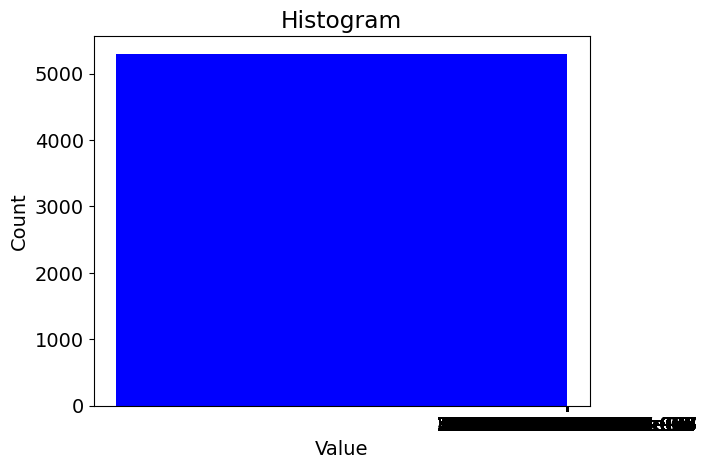


NW 2003 BETWEENNESS CENTRALITY
The mean betwenness centrality is 7.017667245729678e-08, with stdev 2.5307308769728727e-07
The maximum node is http://local/local.owl#semantic_web, with value 1.275429506021484e-05
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(1.275429506021484e-05, 1.1652533115042545e-05, 5.825519600270308e-06, 5.572301092193423e-06, 4.917468568848082e-06, 4.780526406171301e-06, 3.215899951151486e-06, 3.102362449004917e-06, 3.0500754414374175e-06, 3.033891367666526e-06, 2.9914392972367224e-06, 2.8284781236513527e-06, 2.1387875952610146e-06, 2.077786086432266e-06, 1.8449844098817363e-06, 1.8335310653669542e-06, 1.7478799672563817e-06, 1.7254712497274537e-06, 1.701817603446919e-06, 1.6881233871792404e-06, 1.6637227836477424e-06, 1.6619798833954912e-06, 1.6582450971406702e-06, 1.6426834877455812e-06, 1.5760797995346007e-06, 1.4906776871743537e-06, 1.4827101431640674e-06, 1.4129941330740695e-06, 1.3930752730483557e-06, 1.3818709142838

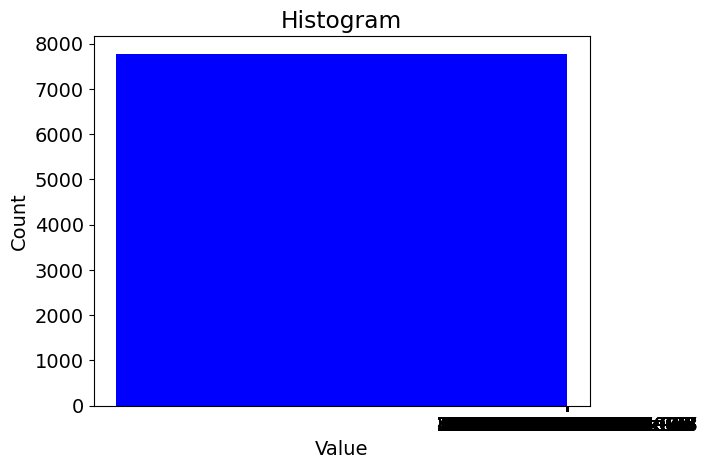


NW 2004 BETWEENNESS CENTRALITY
The mean betwenness centrality is 5.964144867700623e-08, with stdev 2.6824950940155974e-07
The maximum node is http://local/local.owl#semantic_web, with value 1.753760739197448e-05
The minimum node is metadata author, with value 0.0
(1.753760739197448e-05, 1.2320382975441056e-05, 5.928593693827857e-06, 5.347662772692383e-06, 4.863088927009249e-06, 4.340406012899629e-06, 4.2322754041122796e-06, 4.157916246206941e-06, 3.4646203753478436e-06, 3.3707419384923515e-06, 3.2795486934501066e-06, 2.905170988718361e-06, 2.331882536589828e-06, 2.236971333652318e-06, 2.145984641826478e-06, 2.0448768423968554e-06, 2.0386802459047437e-06, 1.99241232543031e-06, 1.960603130104137e-06, 1.9446985324410496e-06, 1.8357417107880862e-06, 1.8309909868108012e-06, 1.8248976669268905e-06, 1.800111280958444e-06, 1.7557023394316439e-06, 1.7536368072676063e-06, 1.7500221259805413e-06, 1.6941494809433344e-06, 1.6854742458543778e-06, 1.6224755148512427e-06, 1.5987218949648144e-06, 1.58

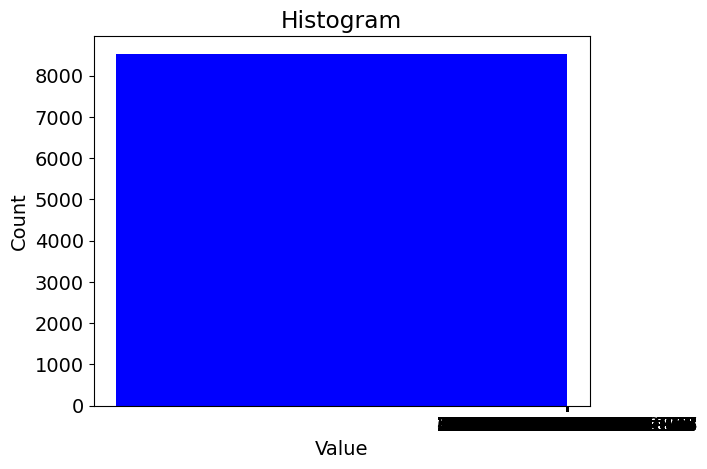


NW 2005 BETWEENNESS CENTRALITY
The mean betwenness centrality is 5.78859578719362e-08, with stdev 2.738116246308463e-07
The maximum node is http://local/local.owl#popular_database_representation, with value 1.5577167051163518e-05
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(1.5577167051163518e-05, 1.1384335033984921e-05, 8.963991792338493e-06, 7.621400983124637e-06, 6.750990285887561e-06, 6.103489645259981e-06, 5.301190354209138e-06, 4.160987723377239e-06, 3.7257823747587016e-06, 3.6620937871559884e-06, 3.567887751326976e-06, 3.253425350038581e-06, 3.2498870951717633e-06, 3.0100818715732158e-06, 2.9225985199911565e-06, 2.899157581498491e-06, 2.791683089918913e-06, 2.6006173271107745e-06, 2.547543504108514e-06, 2.543562967383338e-06, 2.494469681106253e-06, 2.449799213412684e-06, 2.3405555943996972e-06, 2.336132775816175e-06, 2.2927891536976623e-06, 2.0804938616886195e-06, 2.043342185587037e-06, 1.942501921882742e-06, 1.9371945395825156e-06, 1.93

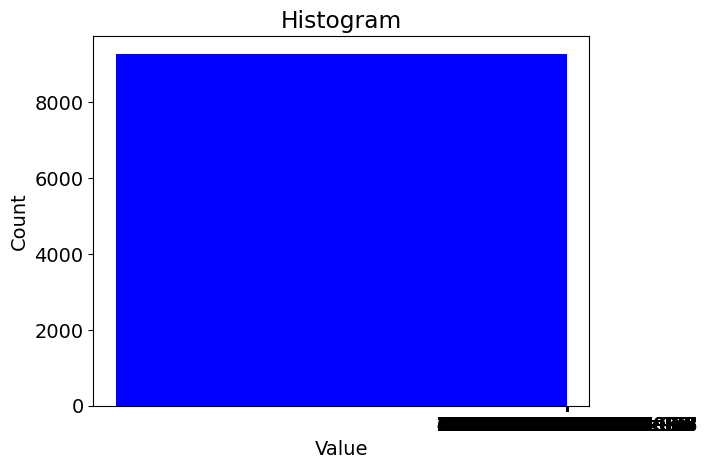


NW 2006 BETWEENNESS CENTRALITY
The mean betwenness centrality is 6.071105480964386e-08, with stdev 2.091716141935635e-07
The maximum node is http://local/local.owl#modular_ontology_language, with value 8.125706433097333e-06
The minimum node is http://local/local.owl#s2006.529.1, with value 0.0
(8.125706433097333e-06, 7.370087643725772e-06, 4.705718840547695e-06, 4.522303189733356e-06, 4.352885806048602e-06, 4.007243662198266e-06, 3.3825949611760938e-06, 3.192755448048864e-06, 2.9300482430142133e-06, 2.8984083241596735e-06, 2.8686859761448055e-06, 2.7298538473527705e-06, 2.5024299457680286e-06, 2.4736663831729936e-06, 2.467913670653987e-06, 2.4573670310358065e-06, 2.444902820577959e-06, 2.374432092220123e-06, 2.2658975826948577e-06, 2.2576520280842824e-06, 2.1860307572226456e-06, 2.1630199071466178e-06, 2.1390502716507556e-06, 2.0249548066904503e-06, 1.973659786729305e-06, 1.973180394019388e-06, 1.961674968981374e-06, 1.8696315686772628e-06, 1.78023167674498e-06, 1.695132622267385e-06,

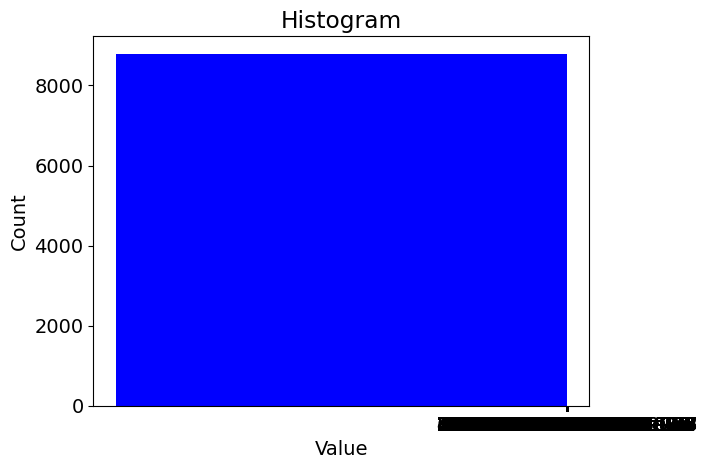


NW 2007 BETWEENNESS CENTRALITY
The mean betwenness centrality is 7.925396801298268e-08, with stdev 2.575437693721712e-07
The maximum node is http://local/local.owl#semantic_web, with value 1.3567224998517966e-05
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(1.3567224998517966e-05, 7.359445864883152e-06, 4.757228175554333e-06, 3.875944978514596e-06, 3.5349811950341e-06, 3.384270726187143e-06, 3.0544983141556797e-06, 2.9276627710666552e-06, 2.694882244926799e-06, 2.6160949899256166e-06, 2.6143043704937716e-06, 2.5784919818568712e-06, 2.4979141074238433e-06, 2.432258061589526e-06, 2.287452373488058e-06, 2.2009697183095395e-06, 2.1979853525897977e-06, 2.167395603962445e-06, 2.1666495125325095e-06, 2.005493763666455e-06, 1.990571935067746e-06, 1.921931523513686e-06, 1.8711973062780762e-06, 1.8322513336354466e-06, 1.8250888559080668e-06, 1.793603797564791e-06, 1.7458539460489228e-06, 1.7413773974693103e-06, 1.7189946545712471e-06, 1.7010884602527967e-

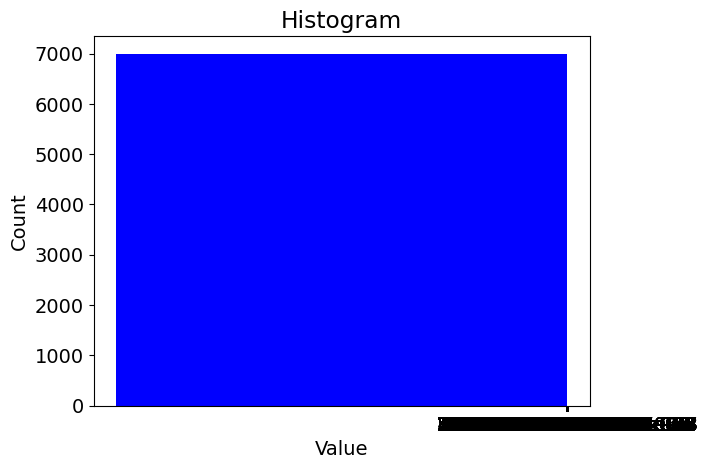


NW 2008 BETWEENNESS CENTRALITY
The mean betwenness centrality is 6.943808540954611e-08, with stdev 2.3588798537506592e-07
The maximum node is http://local/local.owl#ontology, with value 9.450704078799379e-06
The minimum node is http://local/local.owl#s2008.244.4, with value 0.0
(9.450704078799379e-06, 7.996404603669629e-06, 6.889630036157455e-06, 5.047568625020778e-06, 4.766934573515434e-06, 3.5329136073070033e-06, 3.5060034927790936e-06, 3.29187586717844e-06, 3.154506139683587e-06, 3.123111006067692e-06, 2.7294544735451277e-06, 2.643598393860844e-06, 2.5603051822268378e-06, 2.48726344279394e-06, 2.4763712535802624e-06, 2.457149743203184e-06, 2.215599429464566e-06, 2.1685067290407247e-06, 2.1649827854715934e-06, 2.145120558081945e-06, 1.983659870914487e-06, 1.8889618964567482e-06, 1.8760194128028486e-06, 1.8760194128028483e-06, 1.8606422045011856e-06, 1.7811932949425959e-06, 1.7735046907917633e-06, 1.7645346526157937e-06, 1.7626125015780858e-06, 1.6953372152583117e-06, 1.6530498924287

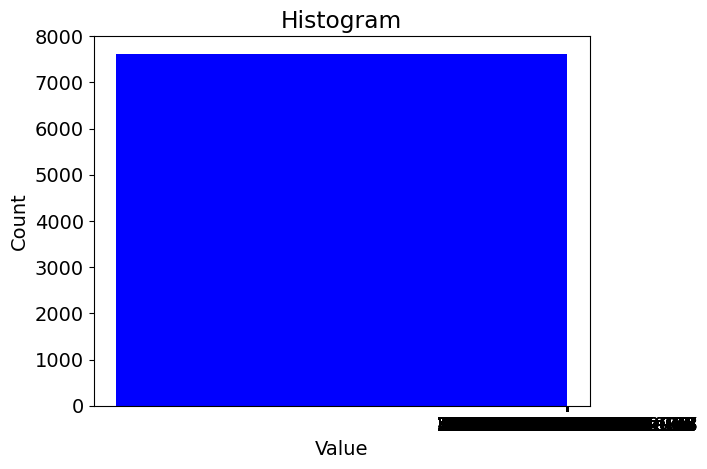


NW 2009 BETWEENNESS CENTRALITY
The mean betwenness centrality is 6.235049101036402e-08, with stdev 2.086151463852414e-07
The maximum node is http://local/local.owl#semantic_web, with value 8.204943848316945e-06
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(8.204943848316945e-06, 7.304387381643543e-06, 6.582125196518342e-06, 4.592497290324392e-06, 4.103607556525022e-06, 3.2865200687929746e-06, 3.1921490191327474e-06, 2.770261594959773e-06, 2.634894216867125e-06, 2.337131410357962e-06, 2.334860145624864e-06, 2.2406026592012925e-06, 2.203126791105173e-06, 2.024832509556971e-06, 2.0004164136761666e-06, 1.982814111994656e-06, 1.924896861300654e-06, 1.920808584781077e-06, 1.911042146428755e-06, 1.8709543238895739e-06, 1.7653405138005115e-06, 1.729568094254216e-06, 1.7204830353218235e-06, 1.7023129174570388e-06, 1.6392853211135657e-06, 1.635310607830644e-06, 1.6125979604996629e-06, 1.5524094450725628e-06, 1.5262899006419344e-06, 1.5126623122433458e-06,

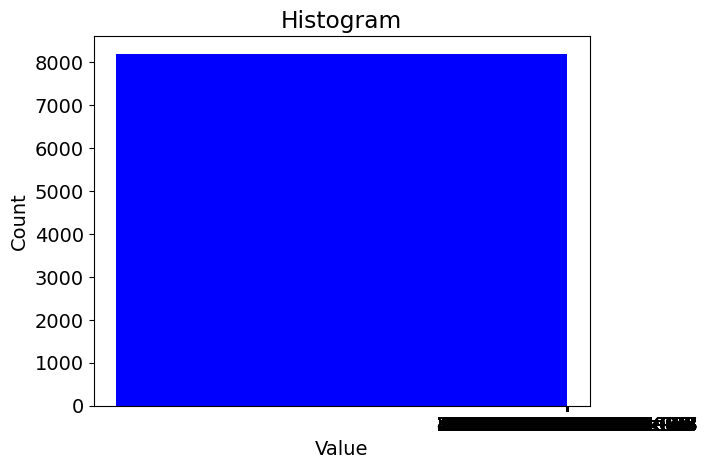


NW 2010 BETWEENNESS CENTRALITY
The mean betwenness centrality is 5.704923631466384e-08, with stdev 1.7257122295038577e-07
The maximum node is http://local/local.owl#semantic_web, with value 5.72773078769853e-06
The minimum node is http://local/local.owl#s2010.144.2, with value 0.0
(5.72773078769853e-06, 4.581467126302098e-06, 4.501824198205431e-06, 3.982043904282393e-06, 3.0222287450839495e-06, 2.67782689385512e-06, 2.447713156947761e-06, 2.3821128043327458e-06, 2.2857622864294423e-06, 2.101261294699712e-06, 1.9531479985611223e-06, 1.875760082585596e-06, 1.8670475357539142e-06, 1.8009346803840939e-06, 1.7548094324516613e-06, 1.7119642021499795e-06, 1.7025341514615712e-06, 1.699459134932742e-06, 1.6912590908558652e-06, 1.6435963346590184e-06, 1.6318087712985077e-06, 1.6082336445774865e-06, 1.586708528875686e-06, 1.5628259005017807e-06, 1.5465283128989875e-06, 1.4944580330108191e-06, 1.4511002999543322e-06, 1.4145076032612693e-06, 1.4145076032612691e-06, 1.4083575702036114e-06, 1.364282

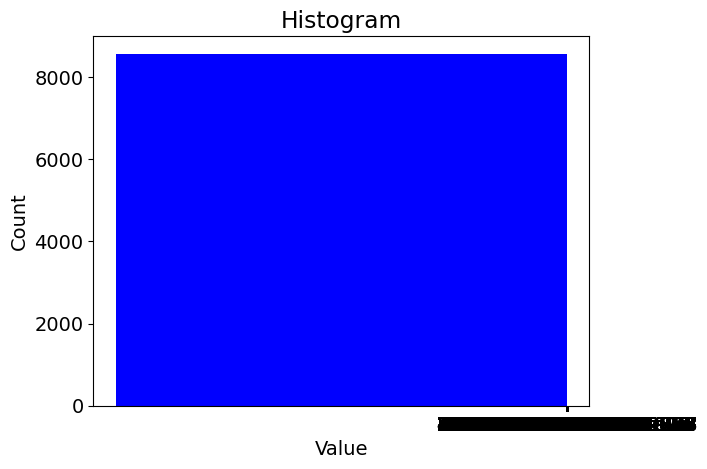


NW 2011 BETWEENNESS CENTRALITY
The mean betwenness centrality is 5.1281300331958185e-08, with stdev 1.5288125867035552e-07
The maximum node is http://local/local.owl#semantic, with value 4.968437896804699e-06
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(4.968437896804699e-06, 3.821020548991478e-06, 3.4562626131603286e-06, 3.3199252760854266e-06, 2.730611726248557e-06, 2.4940746595161976e-06, 2.400155530078349e-06, 2.2958009418140732e-06, 2.226231216304556e-06, 2.217535000615866e-06, 2.2059400463642798e-06, 2.174053922172418e-06, 2.1064166890381645e-06, 2.076463057221567e-06, 2.0175220397760035e-06, 1.8493952031280033e-06, 1.738760014644118e-06, 1.6889983359810605e-06, 1.5943062095931063e-06, 1.5032858187181555e-06, 1.4609642356998648e-06, 1.4223143881945773e-06, 1.416033787974968e-06, 1.404921956817198e-06, 1.3063648456787152e-06, 1.2947698914271287e-06, 1.2695508659299285e-06, 1.1768878565360021e-06, 1.1652929022844158e-06, 1.1479004709070366e

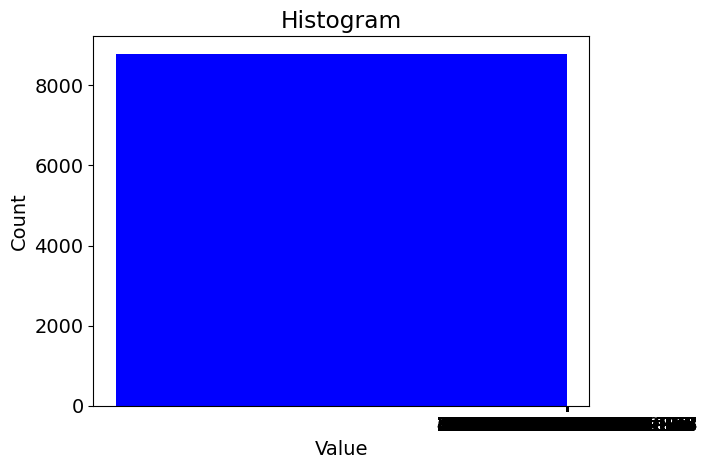


NW 2012 BETWEENNESS CENTRALITY
The mean betwenness centrality is 6.743771865133395e-08, with stdev 1.9738178711061592e-07
The maximum node is http://local/local.owl#semantic_geospatial_query_language_stsparql, with value 4.665960015357228e-06
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(4.665960015357228e-06, 4.2515819592204644e-06, 4.103289304613148e-06, 3.8124884606491495e-06, 3.738867993822822e-06, 3.6240989446453486e-06, 3.0526200709059745e-06, 2.5727723853415125e-06, 2.5278113145297195e-06, 2.479169220376609e-06, 2.474173545841966e-06, 2.4156715677388985e-06, 2.3085274954827265e-06, 2.3032688907094177e-06, 2.271717262069563e-06, 1.9338519053844485e-06, 1.9062442303245754e-06, 1.9055869047279121e-06, 1.8962528812552877e-06, 1.8865244624246658e-06, 1.8696969271500767e-06, 1.868119345718084e-06, 1.856287484978138e-06, 1.8310461820662538e-06, 1.800414809261728e-06, 1.7925269021017644e-06, 1.7668912038318816e-06, 1.6853828298455903e-06, 1.67433

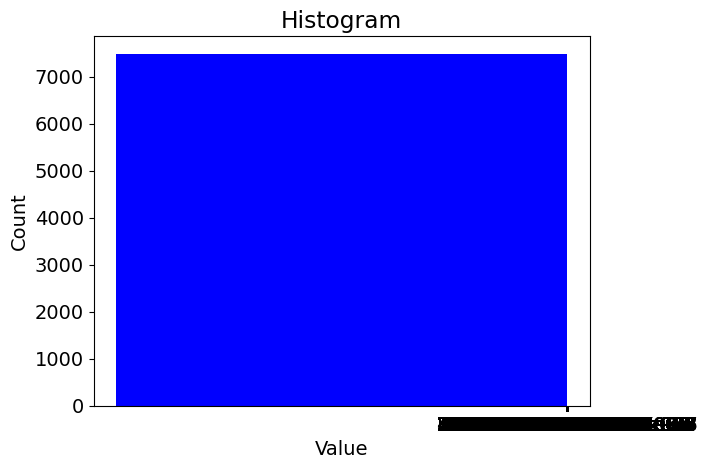


NW 2013 BETWEENNESS CENTRALITY
The mean betwenness centrality is 6.820422326322766e-08, with stdev 2.070003927154951e-07
The maximum node is http://local/local.owl#many_purpose_uninteresting_ontology_file, with value 5.117261051601903e-06
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(5.117261051601903e-06, 4.733862896230666e-06, 4.362923765110786e-06, 4.091090508717591e-06, 3.7133555461878793e-06, 3.710523949767117e-06, 3.5508219116361145e-06, 3.528735459554167e-06, 2.687071739446736e-06, 2.6333846713090802e-06, 2.4827437417245182e-06, 2.4283770904458786e-06, 2.303220528648178e-06, 2.292460462249281e-06, 2.2833993537028414e-06, 2.2617659570482133e-06, 2.188257713965223e-06, 2.1542785569160733e-06, 2.1084066948997217e-06, 2.0795244114079445e-06, 2.0183619287194757e-06, 1.952668891757787e-06, 1.929449801107535e-06, 1.9283171625392292e-06, 1.8076911550147488e-06, 1.7897954656355311e-06, 1.7737119979655998e-06, 1.7714467208289896e-06, 1.739732840916

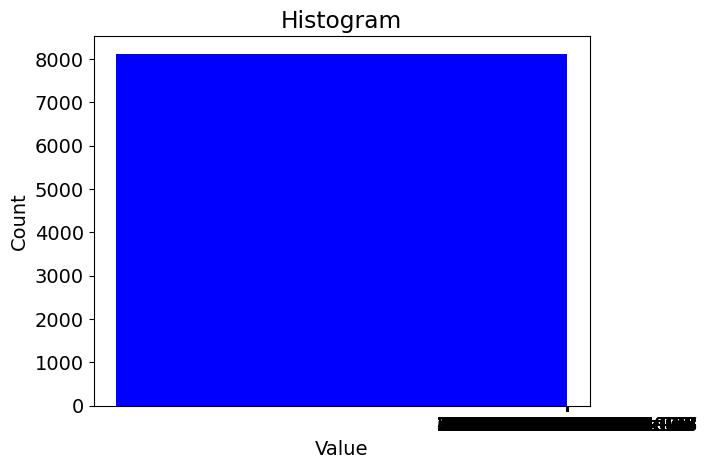


NW 2014 BETWEENNESS CENTRALITY
The mean betwenness centrality is 7.577644032145316e-08, with stdev 3.4886352747089653e-07
The maximum node is http://local/local.owl#dynamic_rdf_datasets, with value 1.4874266933059803e-05
The minimum node is http://local/local.owl#s2014.366.2, with value 0.0
(1.4874266933059803e-05, 1.0467611843615179e-05, 9.911361938882005e-06, 8.867731165239768e-06, 8.546743666101533e-06, 7.445561495389497e-06, 7.089176275040975e-06, 6.8801611593230575e-06, 6.510652294036012e-06, 6.301757578730375e-06, 5.7647717399619824e-06, 5.410794527859054e-06, 4.7636423118545515e-06, 4.5186274728649375e-06, 4.439163200760199e-06, 3.9298694568161895e-06, 3.8094690445362803e-06, 3.7179647312035516e-06, 3.69388464874757e-06, 3.6625805415547912e-06, 3.607196351906036e-06, 3.4566958365561513e-06, 3.2785032263818874e-06, 2.9474020926121417e-06, 2.872151834937199e-06, 2.794493569016659e-06, 2.7066012680523263e-06, 2.698775241254132e-06, 2.692153218578737e-06, 2.5729568104216284e-06, 2.

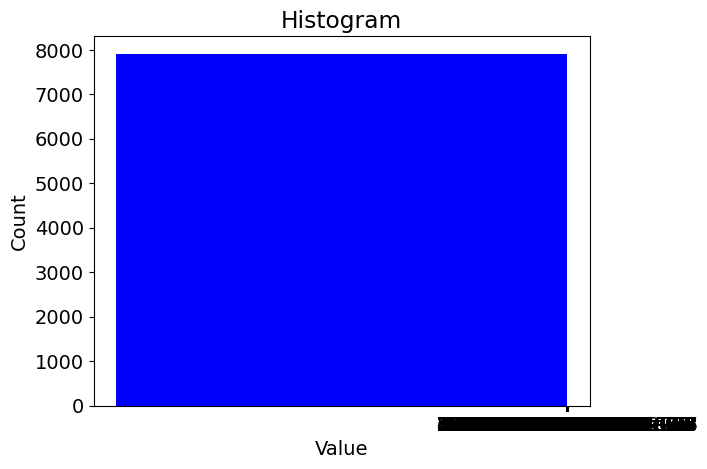


NW 2015 BETWEENNESS CENTRALITY
The mean betwenness centrality is 7.203076366736566e-08, with stdev 1.9286833475942758e-07
The maximum node is http://local/local.owl#data, with value 3.6657993091493536e-06
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(3.6657993091493536e-06, 3.580676532355823e-06, 3.399100643291127e-06, 3.218251057782689e-06, 2.7192805146329015e-06, 2.5175133867042106e-06, 2.5147534331904266e-06, 2.4050815961953497e-06, 2.4026121641040704e-06, 2.3357922369282617e-06, 2.3270765942531563e-06, 2.280593166652594e-06, 2.1614793834261527e-06, 2.1440480980759415e-06, 2.09349737056033e-06, 2.0220291006244657e-06, 1.995882172599149e-06, 1.9828087085864913e-06, 1.961019601898727e-06, 1.8956522818354361e-06, 1.7867067483966182e-06, 1.7779911057215126e-06, 1.763465034596337e-06, 1.7605598203713016e-06, 1.7278761603396563e-06, 1.7095733107219358e-06, 1.6995503216455635e-06, 1.6675929651701769e-06, 1.6559721082700362e-06, 1.622562144682132e-06

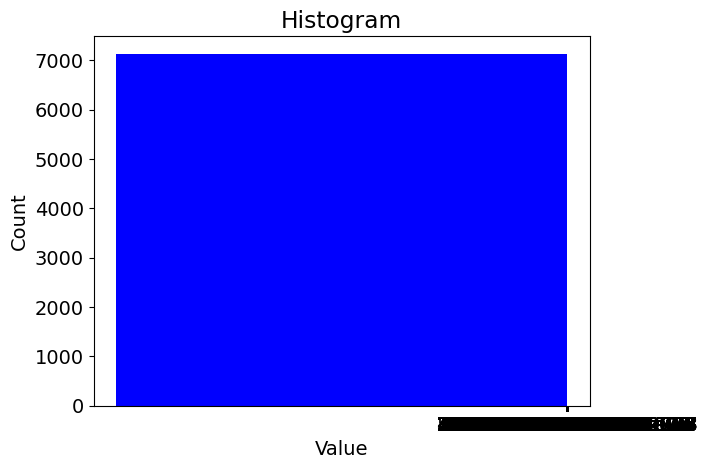


NW 2016 BETWEENNESS CENTRALITY
The mean betwenness centrality is 8.96967840367443e-08, with stdev 2.541021165287184e-07
The maximum node is http://local/local.owl#semantic, with value 8.117265139965481e-06
The minimum node is http://local/local.owl#s2016.89, with value 0.0
(8.117265139965481e-06, 5.984931575674856e-06, 5.014500530195596e-06, 3.422325037604203e-06, 3.408258421153702e-06, 3.3263410665301972e-06, 3.1774004217601884e-06, 3.137682916488186e-06, 2.9147684181490723e-06, 2.747127447980163e-06, 2.5386105453021512e-06, 2.512132208454149e-06, 2.463312774890647e-06, 2.3855326603996418e-06, 2.2539684241861335e-06, 2.2307998794441324e-06, 2.2200430550996318e-06, 2.144745284688127e-06, 2.108337571522125e-06, 2.075239650462123e-06, 2.045451521508121e-06, 2.042969177428621e-06, 2.0413142813756213e-06, 1.975945887282117e-06, 1.9742909912291173e-06, 1.9158022364416565e-06, 1.9064402530561128e-06, 1.8766521241021112e-06, 1.8687086230477107e-06, 1.8642404037046105e-06, 1.86275099725691e-0

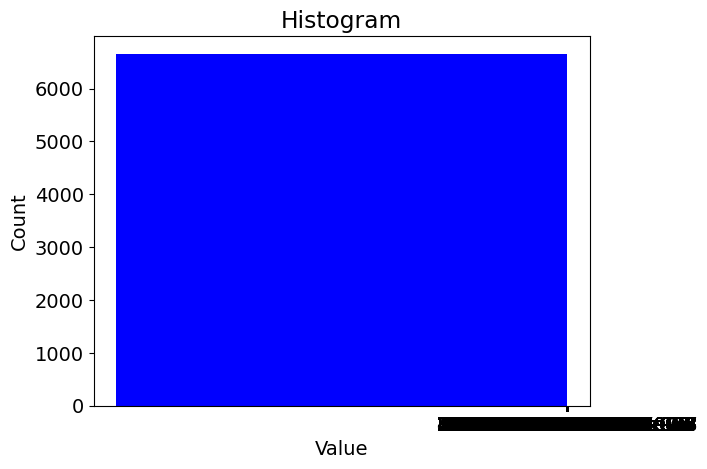


NW 2017 BETWEENNESS CENTRALITY
The mean betwenness centrality is 6.869832137253215e-08, with stdev 2.044365695446797e-07
The maximum node is http://local/local.owl#natural_language, with value 4.791240655482954e-06
The minimum node is map image, with value 0.0
(4.791240655482954e-06, 4.750007947604443e-06, 4.5582758559693685e-06, 4.533536231242263e-06, 4.305416274904401e-06, 3.389328587613589e-06, 2.9923606925132245e-06, 2.859488291374724e-06, 2.746098344708819e-06, 2.59766059634618e-06, 2.566736065437297e-06, 2.5048870036195304e-06, 2.3502643490751152e-06, 2.311093276590531e-06, 2.306970005802679e-06, 2.2141964130760296e-06, 2.1415237654401546e-06, 2.127607726531157e-06, 2.1064759637434203e-06, 2.050811808107431e-06, 2.0410190399862845e-06, 2.0317416807136193e-06, 1.974222053223097e-06, 1.9544303534414115e-06, 1.932267772956712e-06, 1.8833039323509805e-06, 1.8575334899269116e-06, 1.8554718545329858e-06, 1.8390818531512778e-06, 1.8369171359876558e-06, 1.7915611573212942e-06, 1.7544517

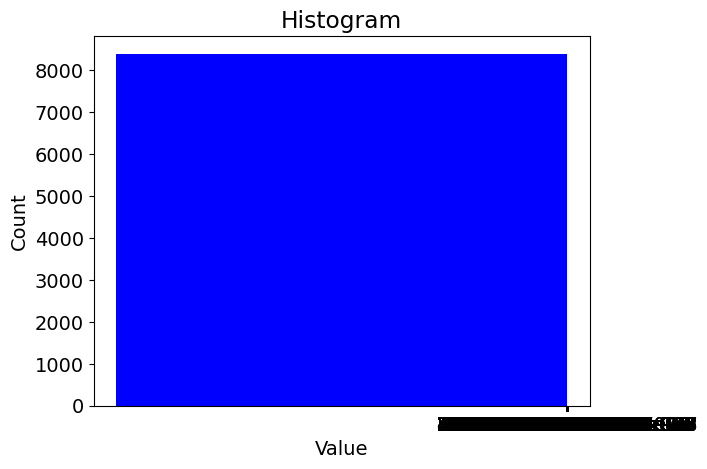


NW 2018 BETWEENNESS CENTRALITY
The mean betwenness centrality is 7.447602675095747e-08, with stdev 2.607112786598505e-07
The maximum node is http://local/local.owl#s2018.638, with value 7.846841127425444e-06
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(7.846841127425444e-06, 7.183285989036149e-06, 6.272888339166032e-06, 5.108650687264808e-06, 4.725719049219784e-06, 4.56043349656645e-06, 4.5170007965991505e-06, 4.177984444076617e-06, 3.8220775971223575e-06, 3.735212197187757e-06, 3.6411080139252763e-06, 3.5922462264620652e-06, 3.4963323473676115e-06, 3.2658977447633277e-06, 3.035463142159044e-06, 2.9534235977763674e-06, 2.860525878401866e-06, 2.69282739797257e-06, 2.6632690327170467e-06, 2.4973802481197225e-06, 2.497380248119722e-06, 2.4847123772959262e-06, 2.4352473578887245e-06, 2.3791467870976292e-06, 2.3688918440497945e-06, 2.367082148217823e-06, 2.2741844288433217e-06, 2.200590131676509e-06, 2.1827344661343968e-06, 2.178873781692859e-06, 2.

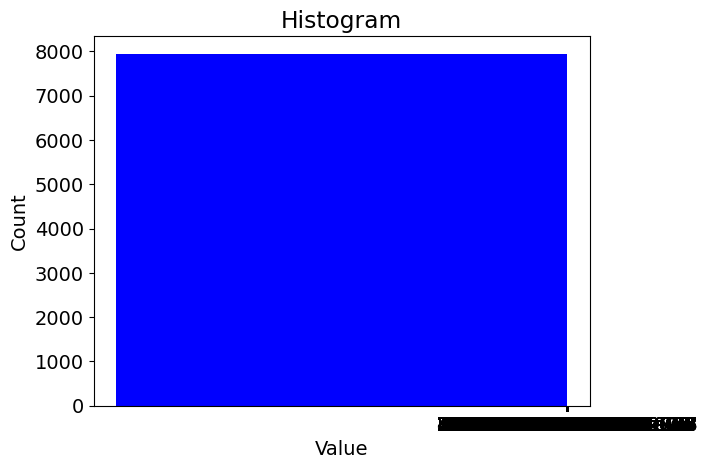


NW 2019 BETWEENNESS CENTRALITY
The mean betwenness centrality is 5.984685564357367e-08, with stdev 1.8478159574953157e-07
The maximum node is http://local/local.owl#knowledge_graph, with value 8.50485695099026e-06
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(8.50485695099026e-06, 5.202659424529401e-06, 3.910279057926556e-06, 3.697091527367283e-06, 3.5059959688866916e-06, 3.1481060212120578e-06, 2.5991205150568315e-06, 2.5847607332056896e-06, 2.3859329844975595e-06, 2.2522765534215386e-06, 2.2213477925113855e-06, 2.014787853575717e-06, 1.948511937339674e-06, 1.8722946336682234e-06, 1.8524118587974109e-06, 1.6546887086932149e-06, 1.6524795114853475e-06, 1.634253634520435e-06, 1.6232076484810944e-06, 1.5475426441116115e-06, 1.5265552706368645e-06, 1.480714428573601e-06, 1.4713253404401617e-06, 1.4315597906985358e-06, 1.4083632200159205e-06, 1.3873758465411737e-06, 1.3680453709723277e-06, 1.3586562828388881e-06, 1.3155769372854599e-06, 1.3122631414

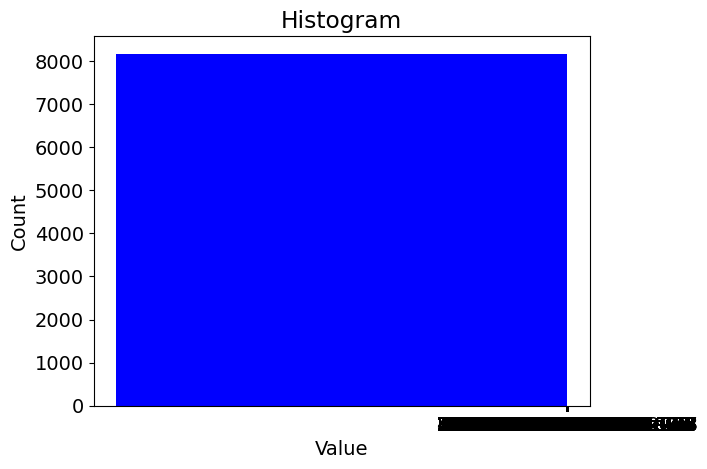


NW 2020 BETWEENNESS CENTRALITY
The mean betwenness centrality is 7.748783820262416e-08, with stdev 2.2830771685695208e-07
The maximum node is http://local/local.owl#knowledge_graph, with value 7.856588598991108e-06
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(7.856588598991108e-06, 4.524883987297959e-06, 4.028033980849556e-06, 3.875725794349004e-06, 3.6642687975569746e-06, 3.5252690933720045e-06, 2.9515256335446817e-06, 2.9234299486562303e-06, 2.901418141397759e-06, 2.771121762155678e-06, 2.7592920000973827e-06, 2.617334855397839e-06, 2.497558514557599e-06, 2.4909042733998075e-06, 2.3748247332027847e-06, 2.306803601367587e-06, 2.235825029017815e-06, 2.218080385930372e-06, 2.1559741351243216e-06, 2.112647631585815e-06, 2.076123241230828e-06, 2.0702083602016806e-06, 2.0642934791725334e-06, 2.053731191620484e-06, 2.0347190740267947e-06, 1.9874000257936133e-06, 1.9164214534438416e-06, 1.8683630450820166e-06, 1.8129110354337573e-06, 1.76263454668600

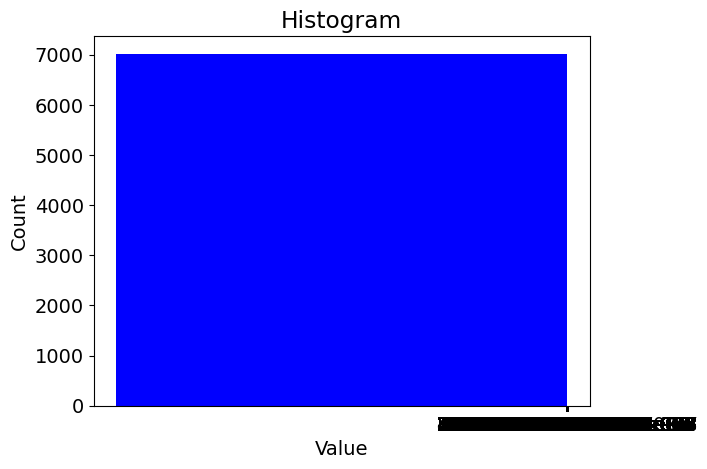


NW 2021 BETWEENNESS CENTRALITY
The mean betwenness centrality is 1.3783800405443657e-07, with stdev 3.8600499768259586e-07
The maximum node is http://local/local.owl#largest_open_collaborative_knowledge_base, with value 8.84433934635951e-06
The minimum node is http://www.w3.org/1999/02/22-rdf-syntax-ns#Class, with value 0.0
(8.84433934635951e-06, 7.929317924653736e-06, 6.450705783746539e-06, 6.17841206906539e-06, 5.690574190181572e-06, 5.5109540533460125e-06, 5.352159439621826e-06, 5.341746678066142e-06, 5.0762212583961866e-06, 4.719584175113992e-06, 4.592027846056859e-06, 4.498312992055698e-06, 4.253613095497112e-06, 3.7017367330458344e-06, 3.532529357765962e-06, 3.29563903237414e-06, 3.280019890040613e-06, 3.1108125147607404e-06, 3.0457327550377123e-06, 2.957224281814393e-06, 2.9520179010365515e-06, 2.8478902854797066e-06, 2.8348743335351013e-06, 2.7489690507007042e-06, 2.74350235088397e-06, 2.7177307660336508e-06, 2.6526510063106235e-06, 2.6409366495604777e-06, 2.587571246587595e-0

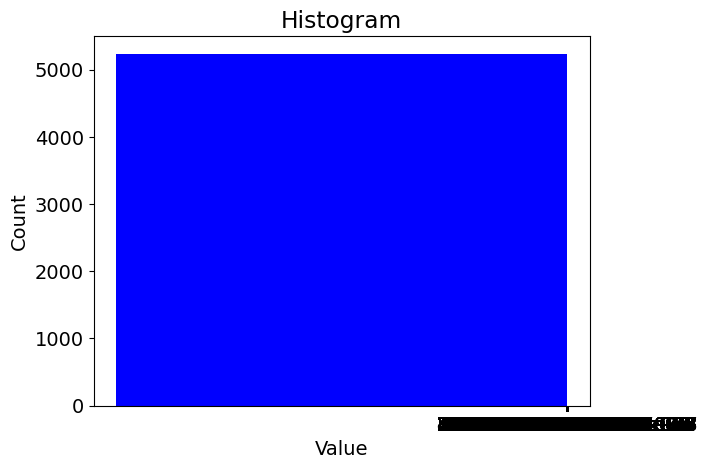

In [14]:
for i in TKG:
    # Degree centrality -- mean and stdev
    dc = nx.degree_centrality(TKG[i])
    degrees = []
    for k,v in dc.items():
        degrees.append(v)

    print(f"NW {i} DEGREE CENTRALITY")
    print("=================")
    print("The mean degree centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
    print("The maximum node is {}, with value {}".format(max(dc, key=dc.get), max(dc.values())))
    print("The minimum node is {}, with value {}".format(min(dc, key=dc.get), min(dc.values())))
    histogram(dc)
    print()

for i in TKG:
    # PageRank -- mean and stdev
    pc = nx.pagerank(TKG[i])
    degrees = []
    for k,v in pc.items():
        degrees.append(v)

    print(f"NW {i} PAGERANK")
    print("======================")
    print("The mean network pagerank is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
    print("The maximum node is {}, with value {}".format(max(pc, key=pc.get), max(pc.values())))
    print("The minimum node is {}, with value {}".format(min(pc, key=pc.get), min(pc.values())))
    histogram(pc)
    print()

for i in TKG:
    # Betweenness centrality -- mean and stdev
    bc = nx.betweenness_centrality(TKG[i])
    degrees = []
    for k,v in bc.items():
        degrees.append(v)

    print(f"NW {i} BETWEENNESS CENTRALITY")
    print("======================")
    print("The mean betwenness centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
    print("The maximum node is {}, with value {}".format(max(bc, key=bc.get), max(bc.values())))
    print("The minimum node is {}, with value {}".format(min(bc, key=bc.get), min(bc.values())))
    histogram(bc)
    print()